# EVALUATION FINANCIALS

## CORRELATION

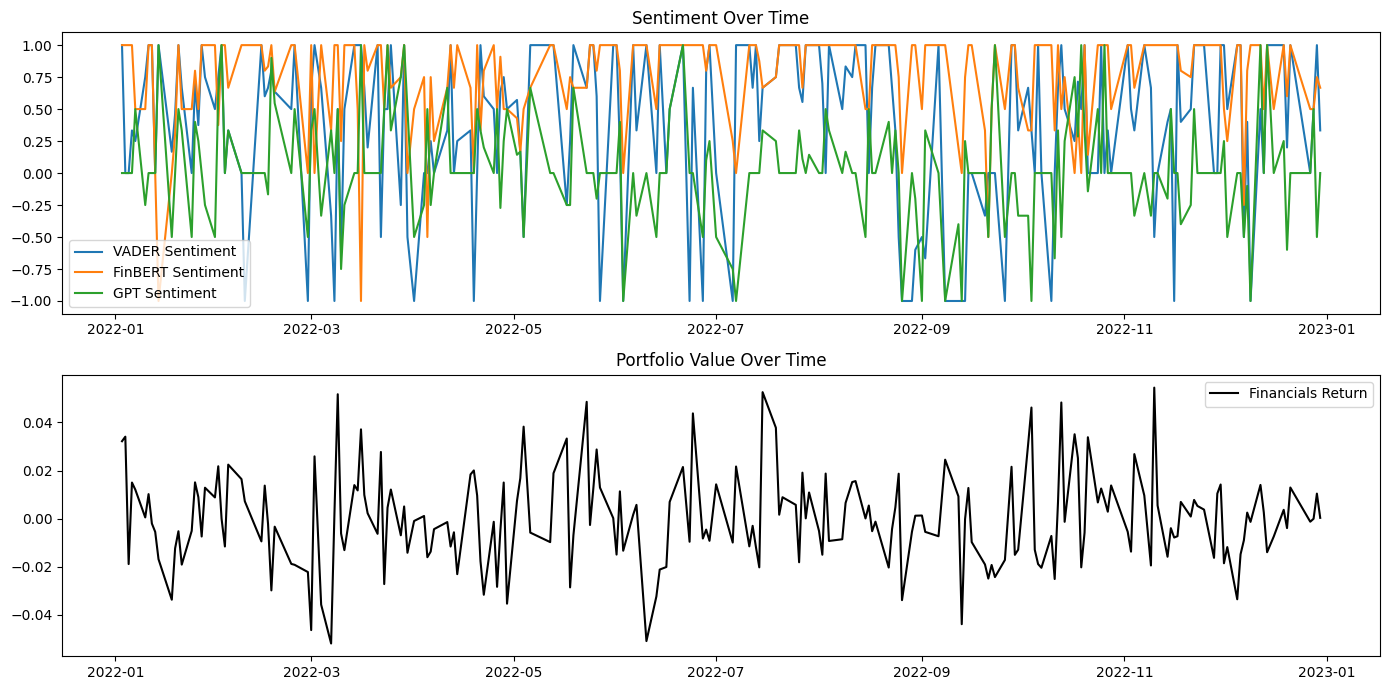

VADER Sentiment         0.051020
FinBERT Sentiment      -0.078854
GPT Sentiment           0.161049
Financials Portfolio    1.000000
Name: Financials Portfolio, dtype: float64


In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Visualisierung der Sentiments und Portfolio-Werte
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['VADER Sentiment'], label='VADER Sentiment')
plt.plot(data['Datum'], data['FinBERT Sentiment'], label='FinBERT Sentiment')
plt.plot(data['Datum'], data['GPT Sentiment'], label='GPT Sentiment')
plt.legend()
plt.title('Sentiment Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Financials Return'], color='black', label='Financials Return')
plt.legend()
plt.title('Portfolio Value Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['VADER Sentiment','FinBERT Sentiment', 'GPT Sentiment' ,'Financials Portfolio']].corr()

# Ausgabe der Korrelationen
print(correlations['Financials Portfolio'])



## CROSS-CORRELATION WITH TIMELAG

In [32]:
import numpy as np

# Setzen des Maximum an Tagen, die als Verzögerung betrachtet werden sollen
max_lag = 10

# Berechnung der Kreuzkorrelation zwischen Portfolio Value und den Sentiment-Werten für verschiedene Verzögerungen
for sentiment in ['VADER Sentiment', 'FinBERT Sentiment']:
    print(f"\nCross-correlation with {sentiment}:")
    for lag in range(max_lag + 1):
        portfolio_lagged = data['Financials Portfolio'].shift(-lag)
        correlation = np.corrcoef(data[sentiment][:-lag if lag != 0 else None], portfolio_lagged[:-lag if lag != 0 else None])[0, 1]
        print(f"Lag = {lag}, Correlation = {correlation}")



Cross-correlation with VADER Sentiment:
Lag = 0, Correlation = 0.05102002980345059
Lag = 1, Correlation = 0.06255463707268613
Lag = 2, Correlation = 0.06932379749738296
Lag = 3, Correlation = 0.09937808750759533
Lag = 4, Correlation = 0.11738025811970676
Lag = 5, Correlation = 0.11639682359941507
Lag = 6, Correlation = 0.09931327878160699
Lag = 7, Correlation = 0.11957088770913112
Lag = 8, Correlation = 0.1343401240927087
Lag = 9, Correlation = 0.15317984065687934
Lag = 10, Correlation = 0.12780079084625975

Cross-correlation with FinBERT Sentiment:
Lag = 0, Correlation = -0.07885354654169753
Lag = 1, Correlation = -0.047337502493924634
Lag = 2, Correlation = -0.03930985942849612
Lag = 3, Correlation = -0.009000362776335072
Lag = 4, Correlation = -0.008995828748948923
Lag = 5, Correlation = 0.002637255645413323
Lag = 6, Correlation = -0.008643750309465915
Lag = 7, Correlation = -0.04801068606806586
Lag = 8, Correlation = -0.06413585065103952
Lag = 9, Correlation = -0.08254736886007097

## CROSS-CORRELATION SMOOTHED INDICATORS

### COMBINED SENTIMENT


Cross-correlation with Smoothed Sentiment Indicator:
Lag = 0, Correlation = 0.2996538929747426
Lag = 1, Correlation = 0.31826048294423454
Lag = 2, Correlation = 0.3137241914262798
Lag = 3, Correlation = 0.28632953760987856
Lag = 4, Correlation = 0.257442502538279
Lag = 5, Correlation = 0.2100540923535048


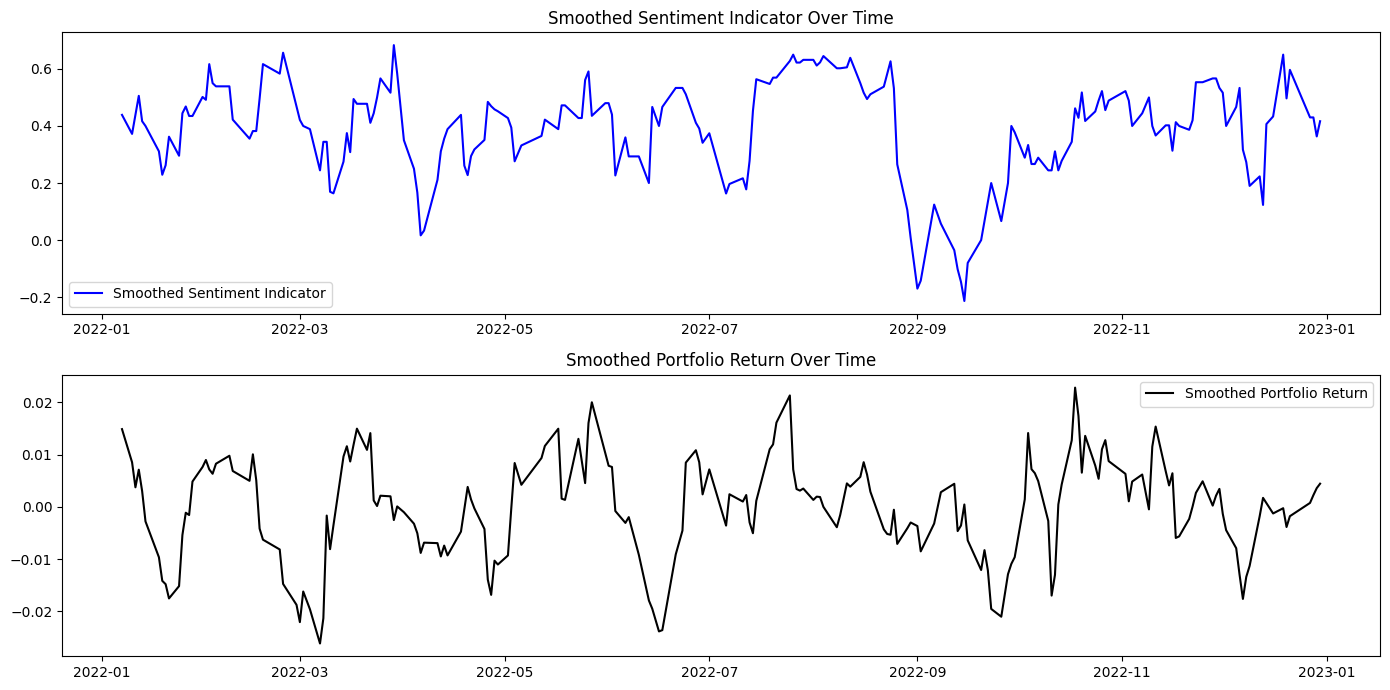

Smoothed Sentiment Indicator    0.274147
Smoothed Portfolio Return       1.000000
Name: Smoothed Portfolio Return, dtype: float64


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Zusammenführen der Sentiments zu einem Sentimentindikator
data['Sentiment Indicator'] = (data['VADER Sentiment'] + data['FinBERT Sentiment'] + data['GPT Sentiment']) / 3

# Glättung des Sentimentindikators mit einem gleitenden Durchschnitt
window_sizeR = 5
window_sizeS = 5
data['Smoothed Sentiment Indicator'] = data['Sentiment Indicator'].rolling(window_sizeS).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_sizeR).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten Sentiment-Indikator für verschiedene Verzögerungen
max_lag = 5

print(f"\nCross-correlation with Smoothed Sentiment Indicator:")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    correlation = np.corrcoef(data['Smoothed Sentiment Indicator'][window_size-1:-lag if lag != 0 else None], portfolio_lagged[window_size-1:-lag if lag != 0 else None])[0, 1]
    print(f"Lag = {lag}, Correlation = {correlation}")

# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['Smoothed Sentiment Indicator'], color='blue', label='Smoothed Sentiment Indicator')
plt.legend()
plt.title('Smoothed Sentiment Indicator Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['Smoothed Sentiment Indicator', 'Smoothed Portfolio Return']].corr()

# Ausgabe der Korrelation
print(correlations['Smoothed Portfolio Return'])


### SEPERATE SENTIMENTS


Cross-correlation with Smoothed Sentiment Indicators (VADER):
Lag = 0, Correlation (VADER) = 0.5672540315431621
Lag = 1, Correlation (VADER) = 0.5568704334415026
Lag = 2, Correlation (VADER) = 0.539687372426314
Lag = 3, Correlation (VADER) = 0.5166056814323002
Lag = 4, Correlation (VADER) = 0.4884204918693019
Lag = 5, Correlation (VADER) = 0.4555907129704657

Cross-correlation with Smoothed Sentiment Indicators (FinBERT):
Lag = 0, Correlation (FinBERT) = 0.5131600920819724
Lag = 1, Correlation (FinBERT) = 0.5332809261772009
Lag = 2, Correlation (FinBERT) = 0.5455222963469428
Lag = 3, Correlation (FinBERT) = 0.5486009341903297
Lag = 4, Correlation (FinBERT) = 0.5446286901586489
Lag = 5, Correlation (FinBERT) = 0.5373609637746611

Cross-correlation with Smoothed Sentiment Indicators (GPT):
Lag = 0, Correlation (GPT) = 0.11626845507156999
Lag = 1, Correlation (GPT) = 0.08518539492920083
Lag = 2, Correlation (GPT) = 0.04572340037867265
Lag = 3, Correlation (GPT) = -0.00393443294842931
Lag

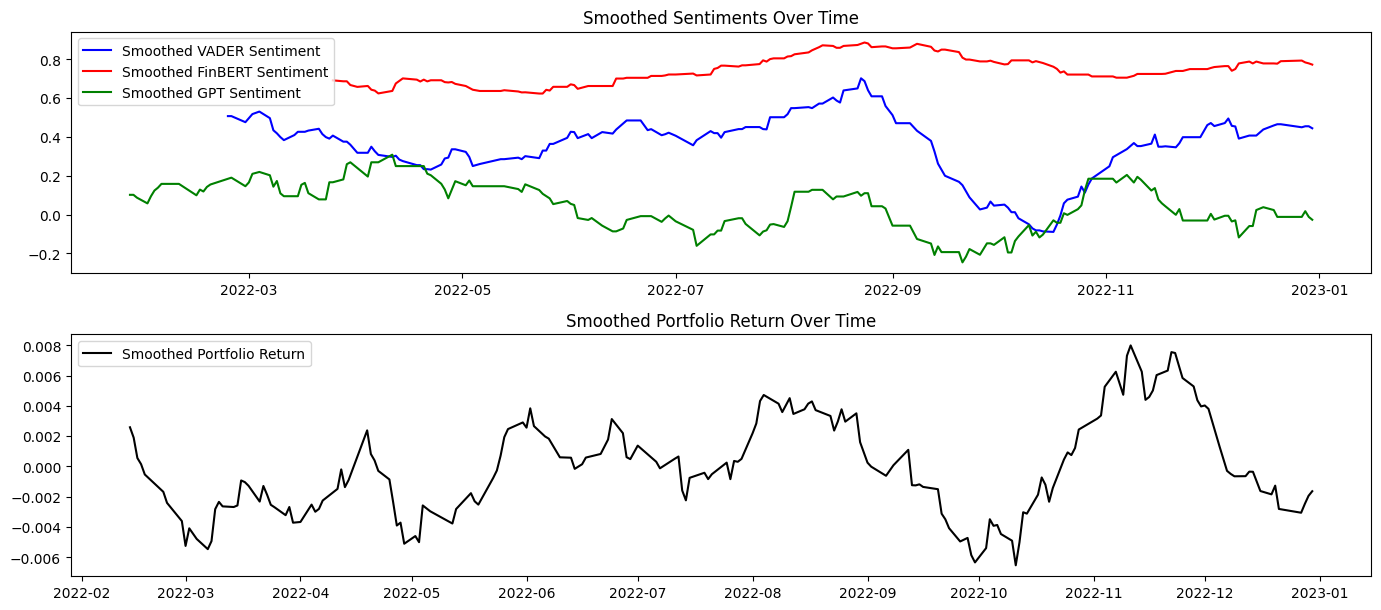


Correlations:
Correlation (VADER and Smoothed Return) = 0.43784007070245395
Correlation (FinBERT and Smoothed Return) = 0.13081566431136735
Correlation (GPT and Smoothed Return) = 0.10791052991864362


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Glättung des VADER Sentiments mit einem gleitenden Durchschnitt
window_size_vader = 32
data['Smoothed VADER Sentiment'] = data['VADER Sentiment'].rolling(window_size_vader).mean()

# Glättung des FinBERT Sentiments mit einem gleitenden Durchschnitt
window_size_finbert = 52
data['Smoothed FinBERT Sentiment'] = data['FinBERT Sentiment'].rolling(window_size_finbert).mean()

# Glättung des GPT Sentiments mit einem gleitenden Durchschnitt
window_size_gpt = 17
data['Smoothed GPT Sentiment'] = data['GPT Sentiment'].rolling(window_size_gpt).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
window_size_portfolio = 27 #27 VADER #39 FinBERT #18 GPT
data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten Sentiment-Indikator für verschiedene Verzögerungen
max_lag = 5

print(f"\nCross-correlation with Smoothed Sentiment Indicators (VADER):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_vader = data['Smoothed VADER Sentiment'].iloc[window_size_vader-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged[:len(sentiment_vader)]  # Zuschneiden auf die gleiche Länge
    correlation_vader = np.corrcoef(sentiment_vader, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (VADER) = {correlation_vader}")

print(f"\nCross-correlation with Smoothed Sentiment Indicators (FinBERT):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_finbert = data['Smoothed FinBERT Sentiment'].iloc[window_size_finbert-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values

    # Zuschneiden auf die gleiche Länge
    min_length = min(len(sentiment_finbert), len(portfolio_lagged))
    sentiment_finbert = sentiment_finbert[:min_length]
    portfolio_lagged = portfolio_lagged[:min_length]

    correlation_finbert = np.corrcoef(sentiment_finbert, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (FinBERT) = {correlation_finbert}")


print(f"\nCross-correlation with Smoothed Sentiment Indicators (GPT):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_gpt = data['Smoothed GPT Sentiment'].iloc[window_size_gpt-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values

    # Zuschneiden auf die gleiche Länge
    min_length = min(len(sentiment_gpt), len(portfolio_lagged))
    sentiment_gpt = sentiment_gpt[:min_length]
    portfolio_lagged = portfolio_lagged[:min_length]

    correlation_gpt = np.corrcoef(sentiment_gpt, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (GPT) = {correlation_gpt}")


# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
plt.plot(data['Datum'], data['Smoothed VADER Sentiment'], color='blue', label='Smoothed VADER Sentiment')
plt.plot(data['Datum'], data['Smoothed FinBERT Sentiment'], color='red', label='Smoothed FinBERT Sentiment')
plt.plot(data['Datum'], data['Smoothed GPT Sentiment'], color='green', label='Smoothed GPT Sentiment')
plt.legend()
plt.title('Smoothed Sentiments Over Time')

plt.subplot(3, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['Smoothed VADER Sentiment', 'Smoothed FinBERT Sentiment', 'Smoothed GPT Sentiment', 'Smoothed Portfolio Return']].corr()

# Ausgabe der Korrelation
print(f"\nCorrelations:")
print(f"Correlation (VADER and Smoothed Return) = {correlations.loc['Smoothed VADER Sentiment', 'Smoothed Portfolio Return']}")
print(f"Correlation (FinBERT and Smoothed Return) = {correlations.loc['Smoothed FinBERT Sentiment', 'Smoothed Portfolio Return']}")
print(f"Correlation (GPT and Smoothed Return) = {correlations.loc['Smoothed GPT Sentiment', 'Smoothed Portfolio Return']}")


## OPTIMIZATION 

[I 2023-07-10 18:52:43,480] A new study created in memory with name: no-name-e50cbda0-6479-4146-8ffe-9b9b9af8f5b2
[I 2023-07-10 18:52:43,483] Trial 0 finished with value: 0.5094153372555779 and parameters: {'window_size_vader': 16, 'window_size_portfolio': 23}. Best is trial 0 with value: 0.5094153372555779.
[I 2023-07-10 18:52:43,485] Trial 1 finished with value: -0.20203722902891205 and parameters: {'window_size_vader': 8, 'window_size_portfolio': 48}. Best is trial 0 with value: 0.5094153372555779.
[I 2023-07-10 18:52:43,487] Trial 2 finished with value: 0.47022081638148033 and parameters: {'window_size_vader': 13, 'window_size_portfolio': 17}. Best is trial 0 with value: 0.5094153372555779.
[I 2023-07-10 18:52:43,489] Trial 3 finished with value: 0.2849894282045197 and parameters: {'window_size_vader': 51, 'window_size_portfolio': 15}. Best is trial 0 with value: 0.5094153372555779.
[I 2023-07-10 18:52:43,491] Trial 4 finished with value: -0.14082791834601963 and parameters: {'wind

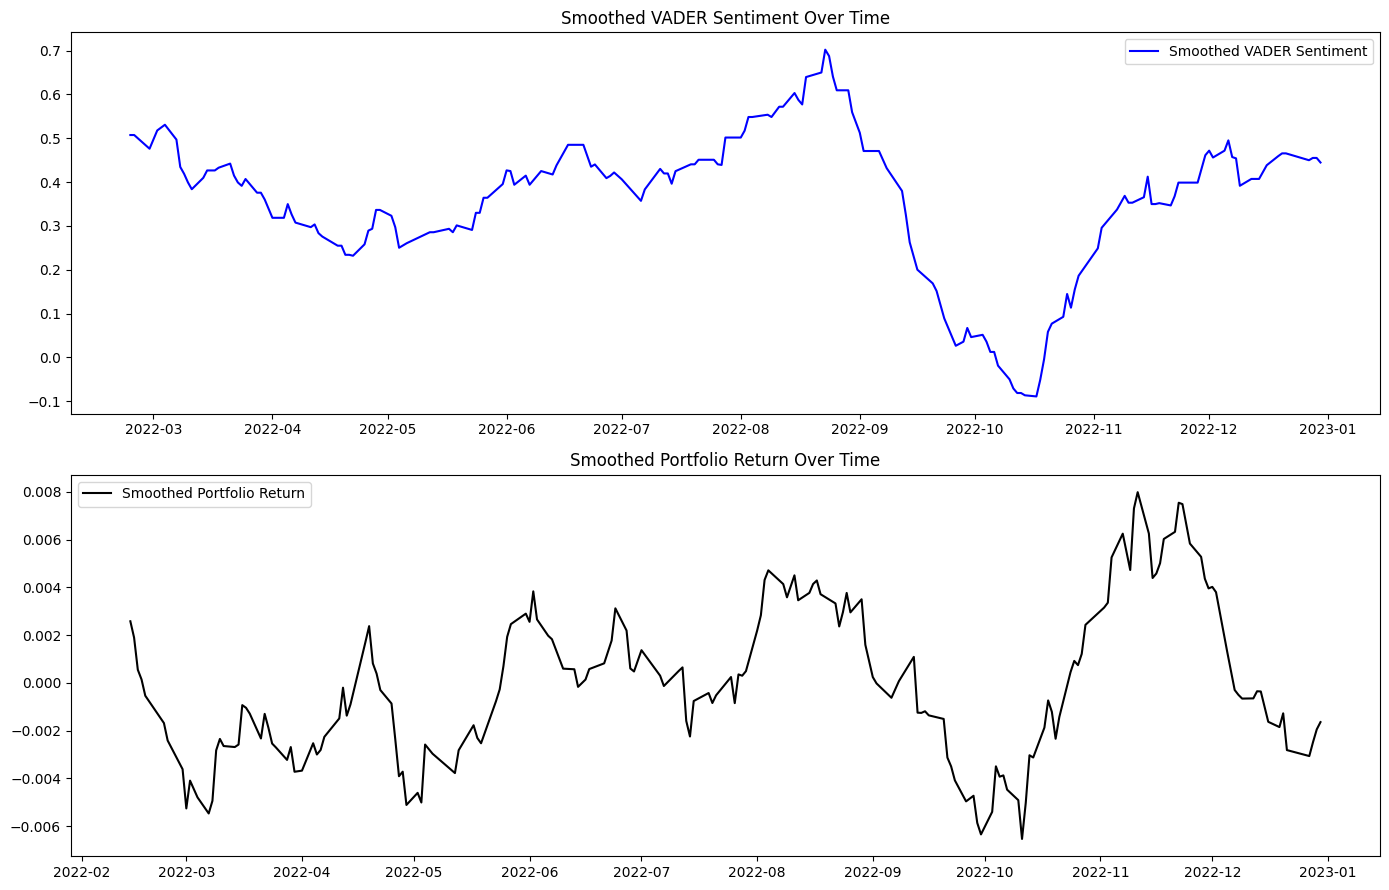


Correlation (VADER and Smoothed Return) = nan


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Optimierung der Fenstergrößen mit Optuna
def objective(trial):
    window_size_vader = trial.suggest_int('window_size_vader', 1, 60)
    window_size_portfolio = trial.suggest_int('window_size_portfolio', 1, 60)
    
    # Glättung des VADER Sentiments mit einem gleitenden Durchschnitt
    data['Smoothed VADER Sentiment'] = data['VADER Sentiment'].rolling(window_size_vader).mean()

    # Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
    data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

    # Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten VADER Sentiment für verschiedene Verzögerungen
    max_lag = 5
    correlations = []
    for lag in range(max_lag + 1):
        portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
        sentiment_vader = data['Smoothed VADER Sentiment'].iloc[window_size_vader-1:-lag if lag != 0 else None].values
        portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
        length = min(len(sentiment_vader), len(portfolio_lagged))
        sentiment_vader = sentiment_vader[:length]
        portfolio_lagged = portfolio_lagged[:length]
        correlation_vader = np.corrcoef(sentiment_vader, portfolio_lagged)[0, 1]
        correlations.append(correlation_vader)

    # Maximierung der Kreuzkorrelation
    max_correlation = max(correlations)

    return max_correlation

# Optimierungsprozess mit Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Beste Parameter ermitteln
best_params = study.best_params
window_size_vader = best_params['window_size_vader']
window_size_portfolio = best_params['window_size_portfolio']

# Glättung des VADER Sentiments mit einem gleitenden Durchschnitt
data['Smoothed VADER Sentiment'] = data['VADER Sentiment'].rolling(window_size_vader).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten VADER Sentiment für verschiedene Verzögerungen
max_lag = 10
correlations = []
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_vader = data['Smoothed VADER Sentiment'].iloc[window_size_vader-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
    length = min(len(sentiment_vader), len(portfolio_lagged))
    sentiment_vader = sentiment_vader[:length]
    portfolio_lagged = portfolio_lagged[:length]
    correlation_vader = np.corrcoef(sentiment_vader, portfolio_lagged)[0, 1]
    correlations.append(correlation_vader)

# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['Smoothed VADER Sentiment'], color='blue', label='Smoothed VADER Sentiment')
plt.legend()
plt.title('Smoothed VADER Sentiment Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelation
correlation_vader = np.corrcoef(data['Smoothed VADER Sentiment'], data['Smoothed Portfolio Return'])[0, 1]

# Ausgabe der Korrelation
print(f"\nCorrelation (VADER and Smoothed Return) = {correlation_vader}")


[I 2023-07-10 18:54:42,663] A new study created in memory with name: no-name-6e75fc76-b887-49b0-81c4-7a0ee6d07db1
[I 2023-07-10 18:54:42,667] Trial 0 finished with value: 0.26588064871124195 and parameters: {'window_size_finbert': 5, 'window_size_portfolio': 6}. Best is trial 0 with value: 0.26588064871124195.
[I 2023-07-10 18:54:42,670] Trial 1 finished with value: 0.5516741823310338 and parameters: {'window_size_finbert': 33, 'window_size_portfolio': 27}. Best is trial 1 with value: 0.5516741823310338.
[I 2023-07-10 18:54:42,673] Trial 2 finished with value: 0.029556739622779545 and parameters: {'window_size_finbert': 5, 'window_size_portfolio': 31}. Best is trial 1 with value: 0.5516741823310338.
[I 2023-07-10 18:54:42,675] Trial 3 finished with value: 0.01147880825119328 and parameters: {'window_size_finbert': 12, 'window_size_portfolio': 27}. Best is trial 1 with value: 0.5516741823310338.
[I 2023-07-10 18:54:42,678] Trial 4 finished with value: 0.07984654419359234 and parameters:

[I 2023-07-10 18:54:42,683] Trial 7 finished with value: 0.6568407485607254 and parameters: {'window_size_finbert': 58, 'window_size_portfolio': 55}. Best is trial 7 with value: 0.6568407485607254.
[I 2023-07-10 18:54:42,686] Trial 8 finished with value: 0.6677923022286303 and parameters: {'window_size_finbert': 55, 'window_size_portfolio': 42}. Best is trial 8 with value: 0.6677923022286303.
[I 2023-07-10 18:54:42,689] Trial 9 finished with value: 0.26511748028979043 and parameters: {'window_size_finbert': 51, 'window_size_portfolio': 13}. Best is trial 8 with value: 0.6677923022286303.
[I 2023-07-10 18:54:42,698] Trial 10 finished with value: 0.5568089581593335 and parameters: {'window_size_finbert': 42, 'window_size_portfolio': 42}. Best is trial 8 with value: 0.6677923022286303.
[I 2023-07-10 18:54:42,705] Trial 11 finished with value: 0.6534856480535105 and parameters: {'window_size_finbert': 59, 'window_size_portfolio': 46}. Best is trial 8 with value: 0.6677923022286303.
[I 2023

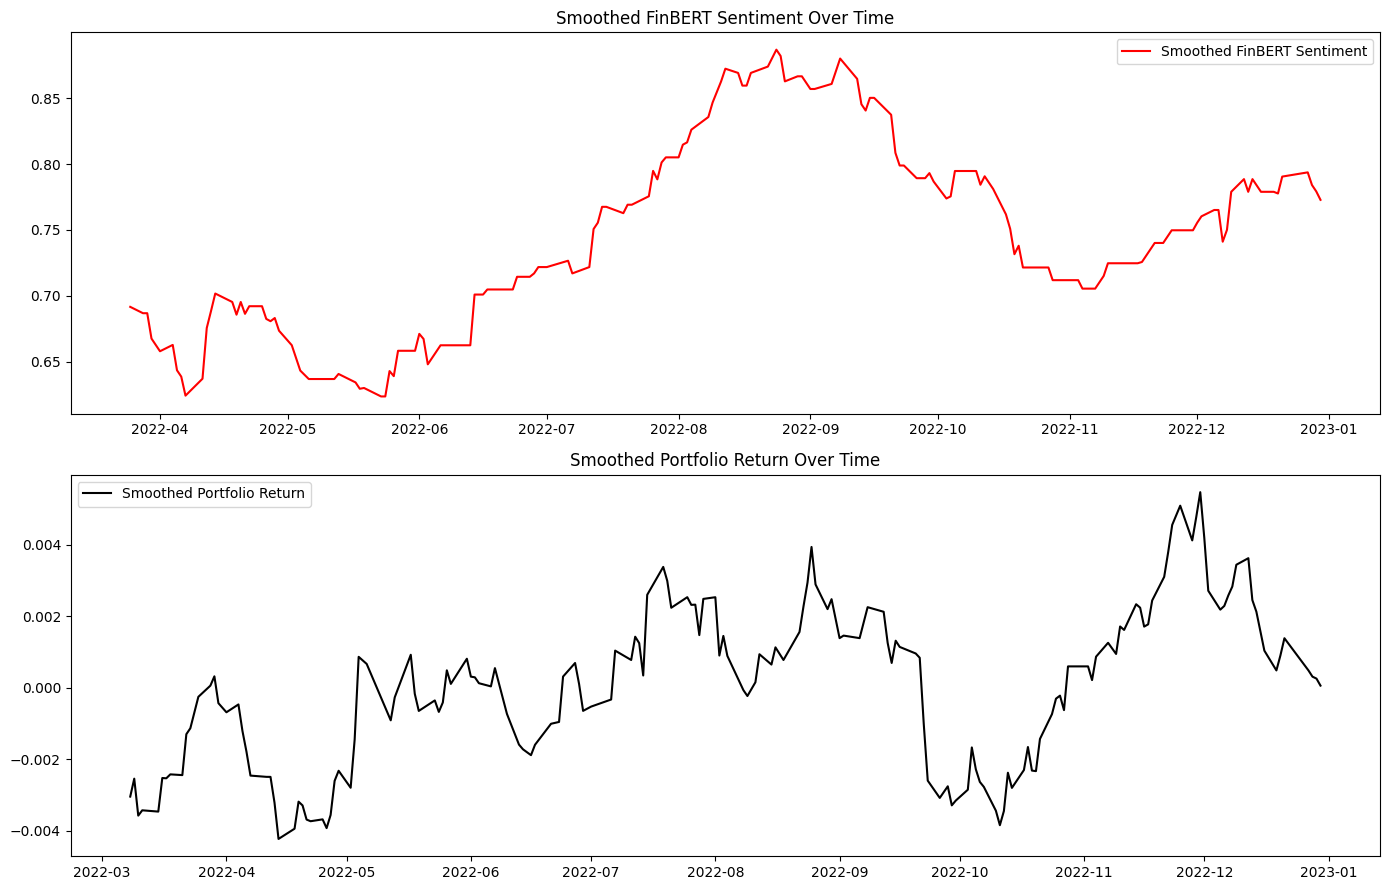


Correlation (FinBERT and Smoothed Return) = nan


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Optimierung der Fenstergrößen mit Optuna
def objective(trial):
    window_size_finbert = trial.suggest_int('window_size_finbert', 1, 60)
    window_size_portfolio = trial.suggest_int('window_size_portfolio', 1, 60)
    
    # Glättung des FinBERT Sentiments mit einem gleitenden Durchschnitt
    data['Smoothed FinBERT Sentiment'] = data['FinBERT Sentiment'].rolling(window_size_finbert).mean()

    # Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
    data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

    # Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten FinBERT Sentiment für verschiedene Verzögerungen
    max_lag = 5
    correlations = []
    for lag in range(max_lag + 1):
        portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
        sentiment_finbert = data['Smoothed FinBERT Sentiment'].iloc[window_size_finbert-1:-lag if lag != 0 else None].values
        portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
        length = min(len(sentiment_finbert), len(portfolio_lagged))
        sentiment_finbert = sentiment_finbert[:length]
        portfolio_lagged = portfolio_lagged[:length]
        correlation_finbert = np.corrcoef(sentiment_finbert, portfolio_lagged)[0, 1]
        correlations.append(correlation_finbert)

    # Maximierung der Kreuzkorrelation
    max_correlation = max(correlations)

    return max_correlation

# Optimierungsprozess mit Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Beste Parameter ermitteln
best_params = study.best_params
window_size_finbert = best_params['window_size_finbert']
window_size_portfolio = best_params['window_size_portfolio']

# Glättung des FinBERT Sentiments mit einem gleitenden Durchschnitt
data['Smoothed FinBERT Sentiment'] = data['FinBERT Sentiment'].rolling(window_size_finbert).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten FinBERT Sentiment für verschiedene Verzögerungen
max_lag = 5
correlations = []
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_finbert = data['Smoothed FinBERT Sentiment'].iloc[window_size_finbert-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
    length = min(len(sentiment_finbert), len(portfolio_lagged))
    sentiment_finbert = sentiment_finbert[:length]
    portfolio_lagged = portfolio_lagged[:length]
    correlation_finbert = np.corrcoef(sentiment_finbert, portfolio_lagged)[0, 1]
    correlations.append(correlation_finbert)

# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['Smoothed FinBERT Sentiment'], color='red', label='Smoothed FinBERT Sentiment')
plt.legend()
plt.title('Smoothed FinBERT Sentiment Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelation
correlation_finbert = np.corrcoef(data['Smoothed FinBERT Sentiment'], data['Smoothed Portfolio Return'])[0, 1]

# Ausgabe der Korrelation
print(f"\nCorrelation (FinBERT and Smoothed Return) = {correlation_finbert}")


[I 2023-07-10 18:57:21,838] A new study created in memory with name: no-name-f3378504-0d74-4540-8423-02988c99c782
[I 2023-07-10 18:57:21,841] Trial 0 finished with value: -0.11211788030397686 and parameters: {'window_size_gpt': 22, 'window_size_portfolio': 37}. Best is trial 0 with value: -0.11211788030397686.
[I 2023-07-10 18:57:21,844] Trial 1 finished with value: -0.32949240221932746 and parameters: {'window_size_gpt': 60, 'window_size_portfolio': 27}. Best is trial 0 with value: -0.11211788030397686.
[I 2023-07-10 18:57:21,847] Trial 2 finished with value: -0.22574553813536505 and parameters: {'window_size_gpt': 26, 'window_size_portfolio': 42}. Best is trial 0 with value: -0.11211788030397686.
[I 2023-07-10 18:57:21,849] Trial 3 finished with value: -0.024685252690997042 and parameters: {'window_size_gpt': 35, 'window_size_portfolio': 23}. Best is trial 3 with value: -0.024685252690997042.
[I 2023-07-10 18:57:21,853] Trial 4 finished with value: -0.19808171925350487 and parameters

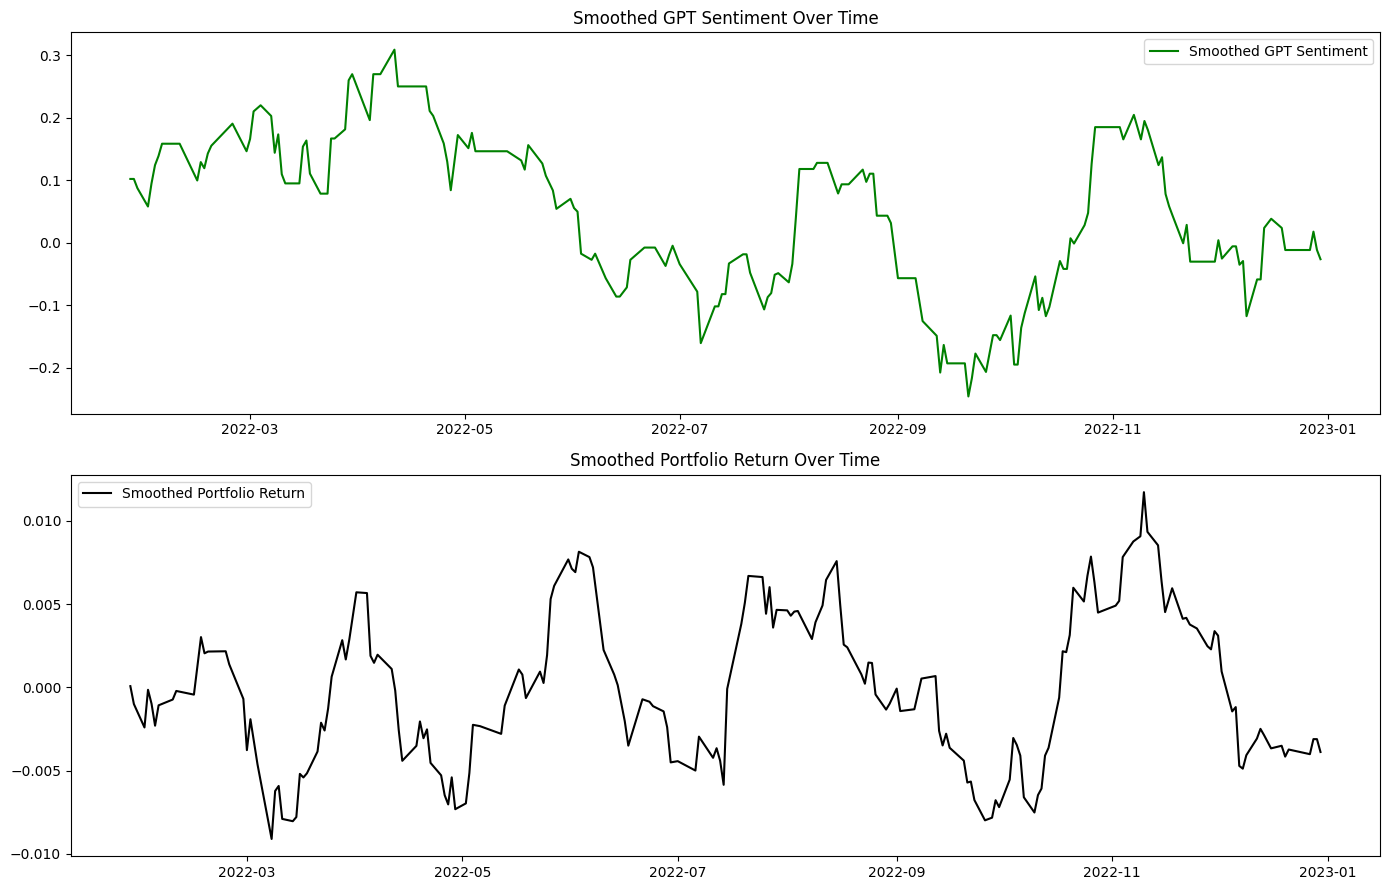


Correlation (GPT and Smoothed Return) = nan


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna

# Daten laden
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Optimierung der Fenstergrößen mit Optuna
def objective(trial):
    window_size_gpt = trial.suggest_int('window_size_gpt', 1, 60)
    window_size_portfolio = trial.suggest_int('window_size_portfolio', 1, 60)
    
    # Glättung des GPT Sentiments mit einem gleitenden Durchschnitt
    data['Smoothed GPT Sentiment'] = data['GPT Sentiment'].rolling(window_size_gpt).mean()

    # Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
    data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

    # Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten GPT Sentiment für verschiedene Verzögerungen
    max_lag = 5
    correlations = []
    for lag in range(max_lag + 1):
        portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
        sentiment_gpt = data['Smoothed GPT Sentiment'].iloc[window_size_gpt-1:-lag if lag != 0 else None].values
        portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
        length = min(len(sentiment_gpt), len(portfolio_lagged))
        sentiment_gpt = sentiment_gpt[:length]
        portfolio_lagged = portfolio_lagged[:length]
        correlation_gpt = np.corrcoef(sentiment_gpt, portfolio_lagged)[0, 1]
        correlations.append(correlation_gpt)

    # Maximierung der Kreuzkorrelation
    max_correlation = max(correlations)

    return max_correlation

# Optimierungsprozess mit Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Beste Parameter ermitteln
best_params = study.best_params
window_size_gpt = best_params['window_size_gpt']
window_size_portfolio = best_params['window_size_portfolio']

# Glättung des GPT Sentiments mit einem gleitenden Durchschnitt
data['Smoothed GPT Sentiment'] = data['GPT Sentiment'].rolling(window_size_gpt).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
data['Smoothed Portfolio Return'] = data['Financials Return'].rolling(window_size_portfolio).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten GPT Sentiment für verschiedene Verzögerungen
max_lag = 5
correlations = []
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_gpt = data['Smoothed GPT Sentiment'].iloc[window_size_gpt-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
    length = min(len(sentiment_gpt), len(portfolio_lagged))
    sentiment_gpt = sentiment_gpt[:length]
    portfolio_lagged = portfolio_lagged[:length]
    correlation_gpt = np.corrcoef(sentiment_gpt, portfolio_lagged)[0, 1]
    correlations.append(correlation_gpt)

# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 9))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['Smoothed GPT Sentiment'], color='green', label='Smoothed GPT Sentiment')
plt.legend()
plt.title('Smoothed GPT Sentiment Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelation
correlation_gpt = np.corrcoef(data['Smoothed GPT Sentiment'], data['Smoothed Portfolio Return'])[0, 1]

# Ausgabe der Korrelation
print(f"\nCorrelation (GPT and Smoothed Return) = {correlation_gpt}")


______________________________________________________________________________________________________________________________________________________________________________________________
______________________________________________________________________________________________________________________________________________________________________________________________

# EVALUATION TECHNOLOGY

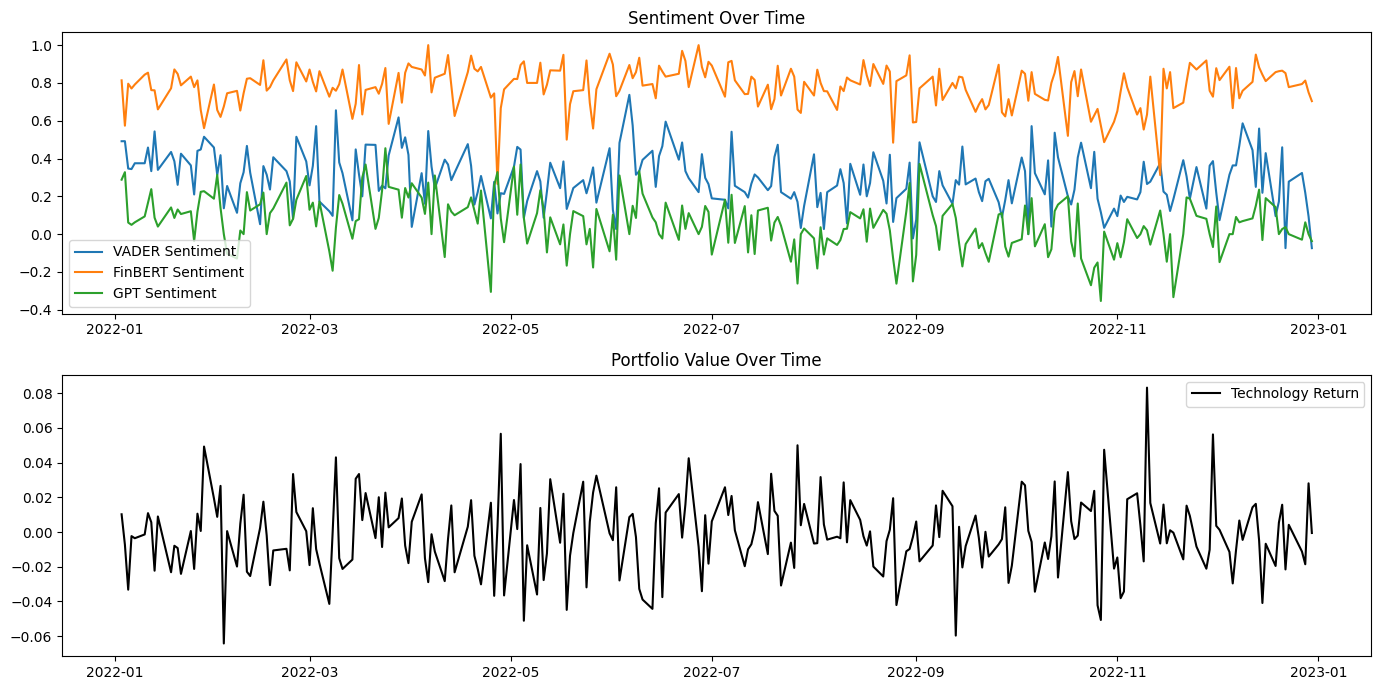

VADER Sentiment         0.241424
FinBERT Sentiment       0.073451
GPT Sentiment           0.383553
Technology Portfolio    1.000000
Name: Technology Portfolio, dtype: float64


In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Visualisierung der Sentiments und Portfolio-Werte
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['VADER Sentiment'], label='VADER Sentiment')
plt.plot(data['Datum'], data['FinBERT Sentiment'], label='FinBERT Sentiment')
plt.plot(data['Datum'], data['GPT Sentiment'], label='GPT Sentiment')
plt.legend()
plt.title('Sentiment Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Technology Return'], color='black', label='Technology Return')
plt.legend()
plt.title('Portfolio Value Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['VADER Sentiment','FinBERT Sentiment', 'GPT Sentiment' ,'Technology Portfolio']].corr()

# Ausgabe der Korrelationen
print(correlations['Technology Portfolio'])



## CROSS-CORRELATION

### COMBINED SENTIMENT


Cross-correlation with Smoothed Sentiment Indicator:
Lag = 0, Correlation = 0.022536696260725804
Lag = 1, Correlation = -0.05597995669509913
Lag = 2, Correlation = -0.13407602782834274
Lag = 3, Correlation = -0.19941113427507276
Lag = 4, Correlation = -0.199862684868926
Lag = 5, Correlation = -0.21125207369774068


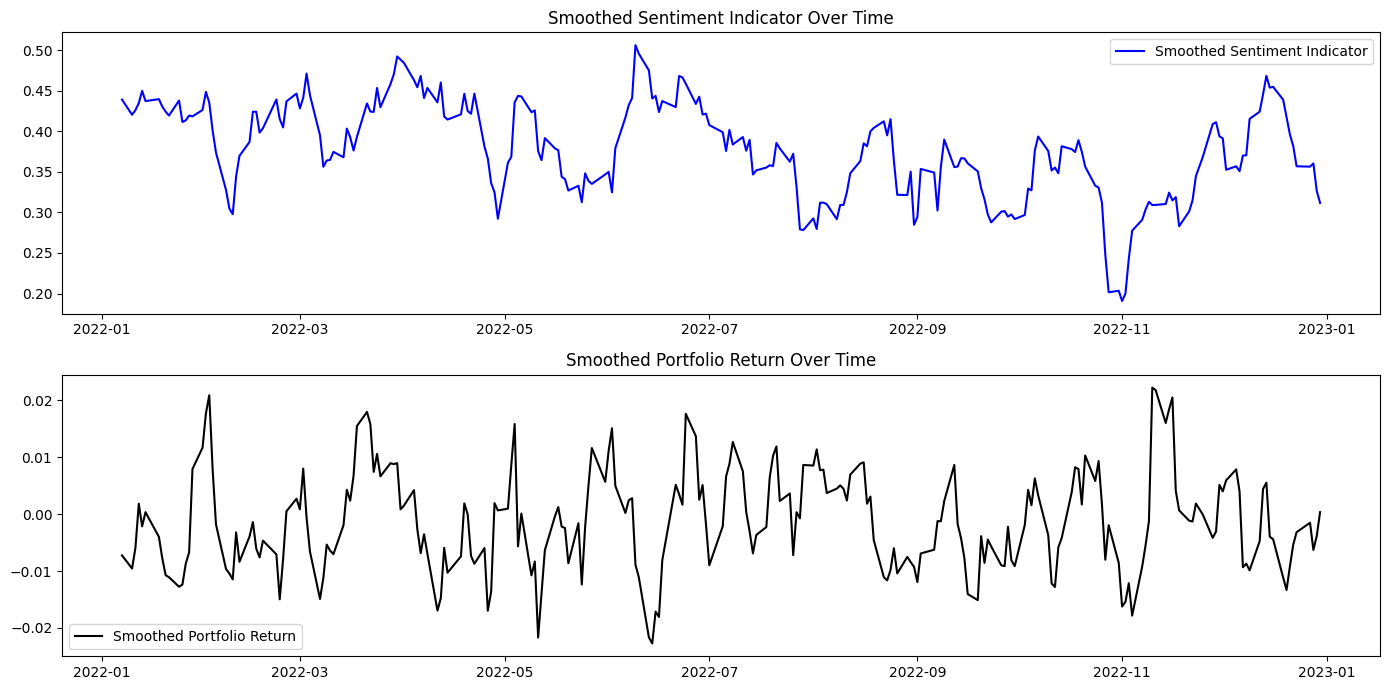

Smoothed Sentiment Indicator    0.025691
Smoothed Portfolio Return       1.000000
Name: Smoothed Portfolio Return, dtype: float64


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Zusammenführen der Sentiments zu einem Sentimentindikator
data['Sentiment Indicator'] = (data['VADER Sentiment'] + data['FinBERT Sentiment'] + data['GPT Sentiment']) / 3

# Glättung des Sentimentindikators mit einem gleitenden Durchschnitt
window_sizeR = 5
window_sizeS = 5
data['Smoothed Sentiment Indicator'] = data['Sentiment Indicator'].rolling(window_sizeS).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
data['Smoothed Portfolio Return'] = data['Technology Return'].rolling(window_sizeR).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten Sentiment-Indikator für verschiedene Verzögerungen
max_lag = 5

print(f"\nCross-correlation with Smoothed Sentiment Indicator:")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    correlation = np.corrcoef(data['Smoothed Sentiment Indicator'][window_size-1:-lag if lag != 0 else None], portfolio_lagged[window_size-1:-lag if lag != 0 else None])[0, 1]
    print(f"Lag = {lag}, Correlation = {correlation}")

# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(data['Datum'], data['Smoothed Sentiment Indicator'], color='blue', label='Smoothed Sentiment Indicator')
plt.legend()
plt.title('Smoothed Sentiment Indicator Over Time')

plt.subplot(2, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['Smoothed Sentiment Indicator', 'Smoothed Portfolio Return']].corr()

# Ausgabe der Korrelation
print(correlations['Smoothed Portfolio Return'])


### SEPERATE SENTIMENTS


Cross-correlation with Smoothed Sentiment Indicators (VADER):
Lag = 0, Correlation (VADER) = 0.38562537368021815
Lag = 1, Correlation (VADER) = 0.3788892740795137
Lag = 2, Correlation (VADER) = 0.3706369218011601
Lag = 3, Correlation (VADER) = 0.3617502938163416
Lag = 4, Correlation (VADER) = 0.3450235379891244
Lag = 5, Correlation (VADER) = 0.3238736909728173

Cross-correlation with Smoothed Sentiment Indicators (FinBERT):
Lag = 0, Correlation (FinBERT) = 0.20097253968791864
Lag = 1, Correlation (FinBERT) = 0.1942972179523325
Lag = 2, Correlation (FinBERT) = 0.1916752324659861
Lag = 3, Correlation (FinBERT) = 0.18701144631017455
Lag = 4, Correlation (FinBERT) = 0.1859028275736933
Lag = 5, Correlation (FinBERT) = 0.19075787349911763

Cross-correlation with Smoothed Sentiment Indicators (GPT):
Lag = 0, Correlation (GPT) = -0.1592361067474776
Lag = 1, Correlation (GPT) = -0.21224500591589815
Lag = 2, Correlation (GPT) = -0.2590278056490184
Lag = 3, Correlation (GPT) = -0.280098989616675

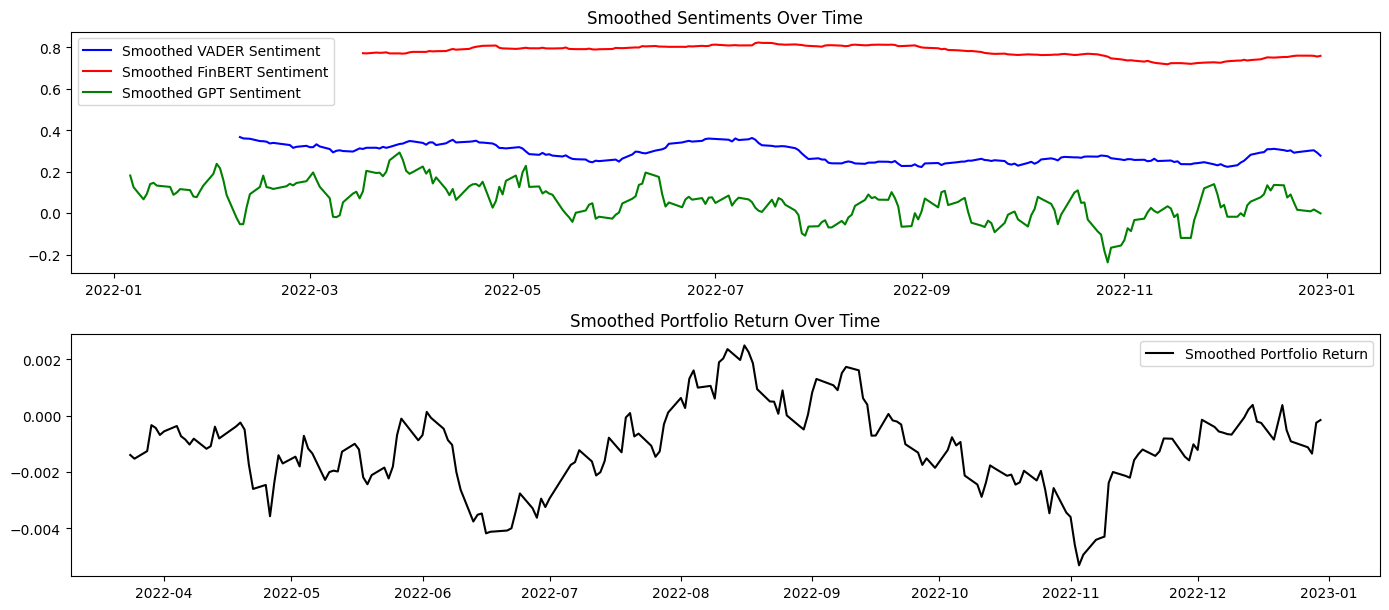


Correlations:
Correlation (VADER and Smoothed Return) = -0.3107388849123899
Correlation (FinBERT and Smoothed Return) = 0.2323294178364867
Correlation (GPT and Smoothed Return) = 0.07084719695340236


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')
portfolio = pd.read_csv('Portfolio_Returns.csv')

# Datum als datetime-Objekt umwandeln
sentiments['Datum'] = pd.to_datetime(sentiments['Datum'])
portfolio['Date'] = pd.to_datetime(portfolio['Date'])

# Zusammenführen der Tabellen auf das Datum
data = pd.merge(sentiments, portfolio, how='inner', left_on='Datum', right_on='Date')

# Daten nach Datum sortieren
data.sort_values(by='Datum', inplace=True)

# Glättung des VADER Sentiments mit einem gleitenden Durchschnitt
window_size_vader = 26
data['Smoothed VADER Sentiment'] = data['VADER Sentiment'].rolling(window_size_vader).mean()

# Glättung des FinBERT Sentiments mit einem gleitenden Durchschnitt
window_size_finbert = 52
data['Smoothed FinBERT Sentiment'] = data['FinBERT Sentiment'].rolling(window_size_finbert).mean()

# Glättung des GPT Sentiments mit einem gleitenden Durchschnitt
window_size_gpt = 4
data['Smoothed GPT Sentiment'] = data['GPT Sentiment'].rolling(window_size_gpt).mean()

# Glättung der Portfolio Returns mit einem gleitenden Durchschnitt
window_size_portfolio = 57 #27 VADER #39 FinBERT #2 GPT
data['Smoothed Portfolio Return'] = data['Technology Return'].rolling(window_size_portfolio).mean()

# Berechnung der Kreuzkorrelation zwischen geglättetem Portfolio Return und dem geglätteten Sentiment-Indikator für verschiedene Verzögerungen
max_lag = 5

print(f"\nCross-correlation with Smoothed Sentiment Indicators (VADER):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_vader = data['Smoothed VADER Sentiment'].iloc[window_size_vader-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values
    min_length = min(len(sentiment_vader), len(portfolio_lagged))  # Bestimmen der kleineren Länge
    sentiment_vader = sentiment_vader[:min_length]
    portfolio_lagged = portfolio_lagged[:min_length]
    correlation_vader = np.corrcoef(sentiment_vader, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (VADER) = {correlation_vader}")


print(f"\nCross-correlation with Smoothed Sentiment Indicators (FinBERT):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_finbert = data['Smoothed FinBERT Sentiment'].iloc[window_size_finbert-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values

    # Zuschneiden auf die gleiche Länge
    min_length = min(len(sentiment_finbert), len(portfolio_lagged))
    sentiment_finbert = sentiment_finbert[:min_length]
    portfolio_lagged = portfolio_lagged[:min_length]

    correlation_finbert = np.corrcoef(sentiment_finbert, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (FinBERT) = {correlation_finbert}")


print(f"\nCross-correlation with Smoothed Sentiment Indicators (GPT):")
for lag in range(max_lag + 1):
    portfolio_lagged = data['Smoothed Portfolio Return'].shift(-lag)
    sentiment_gpt = data['Smoothed GPT Sentiment'].iloc[window_size_gpt-1:-lag if lag != 0 else None].values
    portfolio_lagged = portfolio_lagged.iloc[window_size_portfolio-1:-lag if lag != 0 else None].values

    # Zuschneiden auf die gleiche Länge
    min_length = min(len(sentiment_gpt), len(portfolio_lagged))
    sentiment_gpt = sentiment_gpt[:min_length]
    portfolio_lagged = portfolio_lagged[:min_length]

    correlation_gpt = np.corrcoef(sentiment_gpt, portfolio_lagged)[0, 1]
    print(f"Lag = {lag}, Correlation (GPT) = {correlation_gpt}")


# Visualisierung des Sentimentindikators und des Portfolio-Werts
plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
plt.plot(data['Datum'], data['Smoothed VADER Sentiment'], color='blue', label='Smoothed VADER Sentiment')
plt.plot(data['Datum'], data['Smoothed FinBERT Sentiment'], color='red', label='Smoothed FinBERT Sentiment')
plt.plot(data['Datum'], data['Smoothed GPT Sentiment'], color='green', label='Smoothed GPT Sentiment')
plt.legend()
plt.title('Smoothed Sentiments Over Time')

plt.subplot(3, 1, 2)
plt.plot(data['Datum'], data['Smoothed Portfolio Return'], color='black', label='Smoothed Portfolio Return')
plt.legend()
plt.title('Smoothed Portfolio Return Over Time')

plt.tight_layout()
plt.show()

# Berechnung der Korrelationen
correlations = data[['Smoothed VADER Sentiment', 'Smoothed FinBERT Sentiment', 'Smoothed GPT Sentiment', 'Smoothed Portfolio Return']].corr()

# Ausgabe der Korrelation
print(f"\nCorrelations:")
print(f"Correlation (VADER and Smoothed Return) = {correlations.loc['Smoothed VADER Sentiment', 'Smoothed Portfolio Return']}")
print(f"Correlation (FinBERT and Smoothed Return) = {correlations.loc['Smoothed FinBERT Sentiment', 'Smoothed Portfolio Return']}")
print(f"Correlation (GPT and Smoothed Return) = {correlations.loc['Smoothed GPT Sentiment', 'Smoothed Portfolio Return']}")


# OPTIMIZATION

## TECHNOLOGY

### VADER

[I 2023-07-12 13:54:49,103] A new study created in memory with name: no-name-70c70d3a-62de-4f3e-81b8-3b08d0bd6dc1
[I 2023-07-12 13:54:49,110] Trial 0 finished with value: 0.522967921343413 and parameters: {'moving_average_days': 59, 'lag_days': 4}. Best is trial 0 with value: 0.522967921343413.
[I 2023-07-12 13:54:50,747] Trial 1 finished with value: 0.8533646352995187 and parameters: {'moving_average_days': 11, 'lag_days': 30}. Best is trial 0 with value: 0.522967921343413.
[I 2023-07-12 13:54:50,779] Trial 2 finished with value: 0.34147107327277876 and parameters: {'moving_average_days': 6, 'lag_days': 7}. Best is trial 2 with value: 0.34147107327277876.
[I 2023-07-12 13:54:52,244] Trial 3 finished with value: 0.27647403193161957 and parameters: {'moving_average_days': 27, 'lag_days': 25}. Best is trial 3 with value: 0.27647403193161957.
[I 2023-07-12 13:54:54,390] Trial 4 finished with value: 0.6386097742489573 and parameters: {'moving_average_days': 5, 'lag_days': 30}. Best is tria

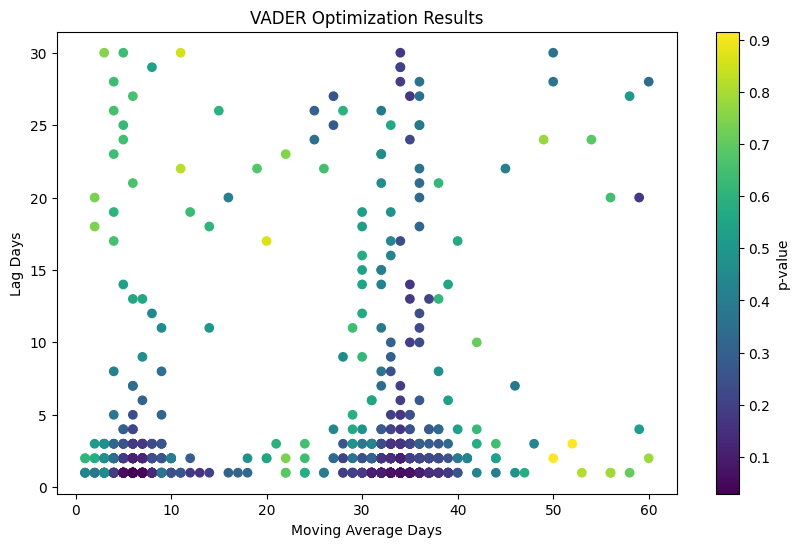

In [1]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')['VADER Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('VADER Optimization Results')
plt.show()


### FinBERT

[I 2023-07-12 13:57:11,442] A new study created in memory with name: no-name-37ba97ca-a254-475a-9fb1-591c4f88c908
[I 2023-07-12 13:57:11,458] Trial 0 finished with value: 0.050201458057904116 and parameters: {'moving_average_days': 38, 'lag_days': 14}. Best is trial 0 with value: 0.050201458057904116.
[I 2023-07-12 13:57:11,850] Trial 1 finished with value: 0.29281443050138994 and parameters: {'moving_average_days': 10, 'lag_days': 22}. Best is trial 0 with value: 0.050201458057904116.
[I 2023-07-12 13:57:11,863] Trial 2 finished with value: 0.10208285069648527 and parameters: {'moving_average_days': 55, 'lag_days': 11}. Best is trial 0 with value: 0.050201458057904116.
[I 2023-07-12 13:57:12,003] Trial 3 finished with value: 0.07138070997758457 and parameters: {'moving_average_days': 11, 'lag_days': 17}. Best is trial 0 with value: 0.050201458057904116.
[I 2023-07-12 13:57:12,101] Trial 4 finished with value: 0.30835284042077177 and parameters: {'moving_average_days': 59, 'lag_days': 

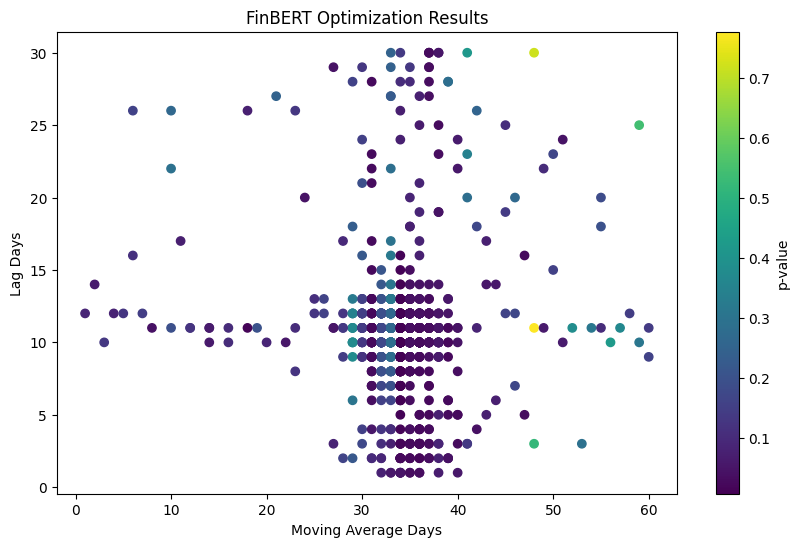

In [2]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests


# Load the data
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')['FinBERT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('FinBERT Optimization Results')
plt.show()


### GPT

[I 2023-07-12 13:59:24,513] A new study created in memory with name: no-name-95d9f1e2-d9bc-4afa-a4e6-1842d1dd5377
[I 2023-07-12 13:59:25,813] Trial 0 finished with value: 0.27587816474896043 and parameters: {'moving_average_days': 29, 'lag_days': 24}. Best is trial 0 with value: 0.27587816474896043.
[I 2023-07-12 13:59:26,732] Trial 1 finished with value: 0.5040132805557372 and parameters: {'moving_average_days': 58, 'lag_days': 27}. Best is trial 0 with value: 0.27587816474896043.
[I 2023-07-12 13:59:27,241] Trial 2 finished with value: 0.38428993360983926 and parameters: {'moving_average_days': 57, 'lag_days': 19}. Best is trial 0 with value: 0.27587816474896043.
[I 2023-07-12 13:59:27,877] Trial 3 finished with value: 0.3806720146505764 and parameters: {'moving_average_days': 39, 'lag_days': 22}. Best is trial 0 with value: 0.27587816474896043.
[I 2023-07-12 13:59:27,891] Trial 4 finished with value: 0.46886718147545225 and parameters: {'moving_average_days': 55, 'lag_days': 10}. Be

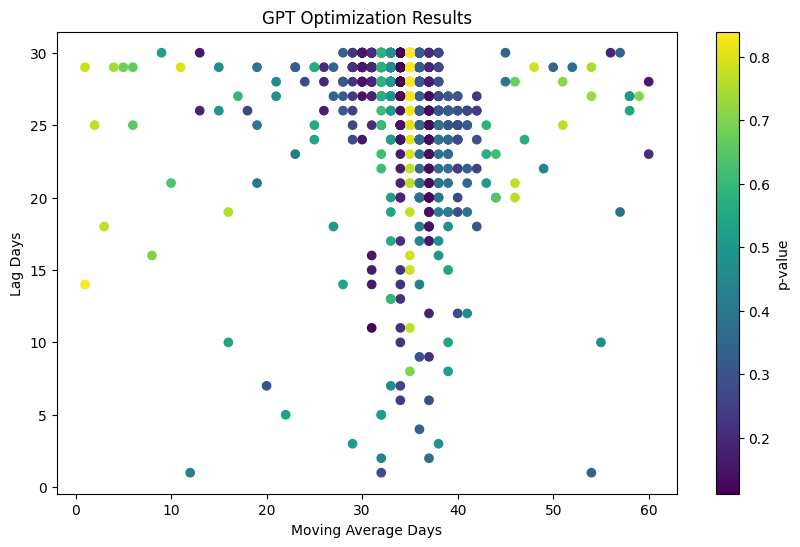

In [3]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests


# Load the data
sentiments = pd.read_csv('Technology_Sentiment_Results.csv')['GPT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('GPT Optimization Results')
plt.show()


# FINANCIALS

## OPTIMIZATION

### VADER

[I 2023-07-12 14:17:14,006] A new study created in memory with name: no-name-a218d618-987c-4497-852f-0080ee93ef23
[I 2023-07-12 14:17:14,015] Trial 0 finished with value: 0.020563750089789522 and parameters: {'moving_average_days': 33, 'lag_days': 6}. Best is trial 0 with value: 0.020563750089789522.
[I 2023-07-12 14:17:14,948] Trial 1 finished with value: 0.4878557479940952 and parameters: {'moving_average_days': 38, 'lag_days': 23}. Best is trial 0 with value: 0.020563750089789522.
[I 2023-07-12 14:17:14,998] Trial 2 finished with value: 0.15575550736700186 and parameters: {'moving_average_days': 40, 'lag_days': 11}. Best is trial 0 with value: 0.020563750089789522.
[I 2023-07-12 14:17:15,811] Trial 3 finished with value: 0.4460778368422792 and parameters: {'moving_average_days': 10, 'lag_days': 19}. Best is trial 0 with value: 0.020563750089789522.
[I 2023-07-12 14:17:15,844] Trial 4 finished with value: 0.04542992271510908 and parameters: {'moving_average_days': 58, 'lag_days': 13}

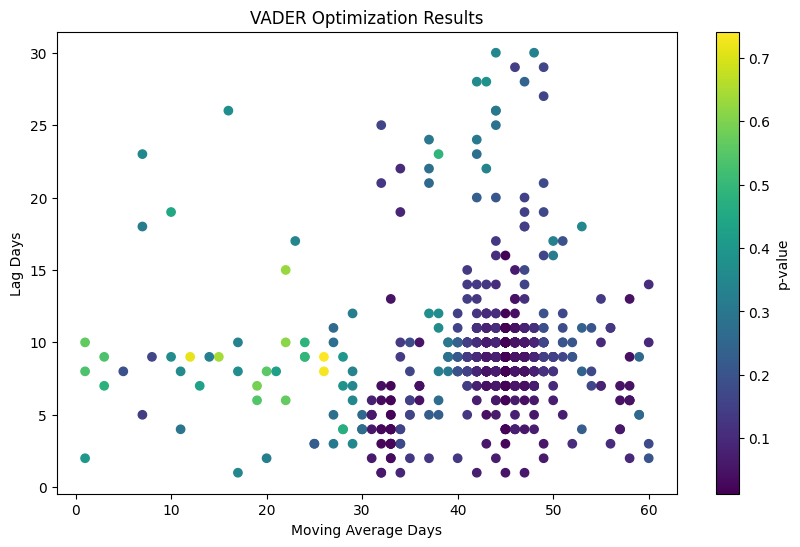

In [4]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')['VADER Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('VADER Optimization Results')
plt.show()


### FinBERT

[I 2023-07-12 14:19:07,440] A new study created in memory with name: no-name-2c68db78-7ec6-4e75-a577-6b8040838cba
[I 2023-07-12 14:19:07,454] Trial 0 finished with value: 0.21242399983940324 and parameters: {'moving_average_days': 43, 'lag_days': 13}. Best is trial 0 with value: 0.21242399983940324.
[I 2023-07-12 14:19:07,470] Trial 1 finished with value: 0.5690742523470446 and parameters: {'moving_average_days': 29, 'lag_days': 14}. Best is trial 0 with value: 0.21242399983940324.
[I 2023-07-12 14:19:07,972] Trial 2 finished with value: 0.3815830071982471 and parameters: {'moving_average_days': 54, 'lag_days': 22}. Best is trial 0 with value: 0.21242399983940324.
[I 2023-07-12 14:19:08,070] Trial 3 finished with value: 0.7709669186470675 and parameters: {'moving_average_days': 45, 'lag_days': 4}. Best is trial 0 with value: 0.21242399983940324.
[I 2023-07-12 14:19:08,571] Trial 4 finished with value: 0.33194545636548417 and parameters: {'moving_average_days': 36, 'lag_days': 18}. Best

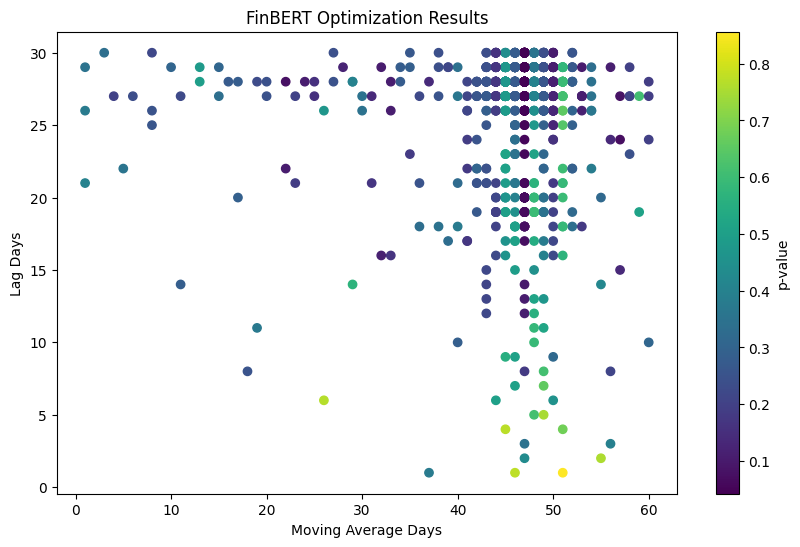

In [5]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')['FinBERT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('FinBERT Optimization Results')
plt.show()


### GPT

[I 2023-07-12 14:36:28,900] A new study created in memory with name: no-name-62116ebb-e6ab-465c-ad7e-86f9427bf4fc
[I 2023-07-12 14:36:28,909] Trial 0 finished with value: 0.21829793464806657 and parameters: {'moving_average_days': 44, 'lag_days': 9}. Best is trial 0 with value: 0.21829793464806657.
[I 2023-07-12 14:36:28,928] Trial 1 finished with value: 0.23446747521280825 and parameters: {'moving_average_days': 38, 'lag_days': 14}. Best is trial 0 with value: 0.21829793464806657.
[I 2023-07-12 14:36:28,961] Trial 2 finished with value: 0.18533481994257303 and parameters: {'moving_average_days': 10, 'lag_days': 13}. Best is trial 2 with value: 0.18533481994257303.
[I 2023-07-12 14:36:28,990] Trial 3 finished with value: 0.5552248697548823 and parameters: {'moving_average_days': 37, 'lag_days': 7}. Best is trial 2 with value: 0.18533481994257303.
[I 2023-07-12 14:36:29,034] Trial 4 finished with value: 0.23272090395258513 and parameters: {'moving_average_days': 12, 'lag_days': 10}. Bes

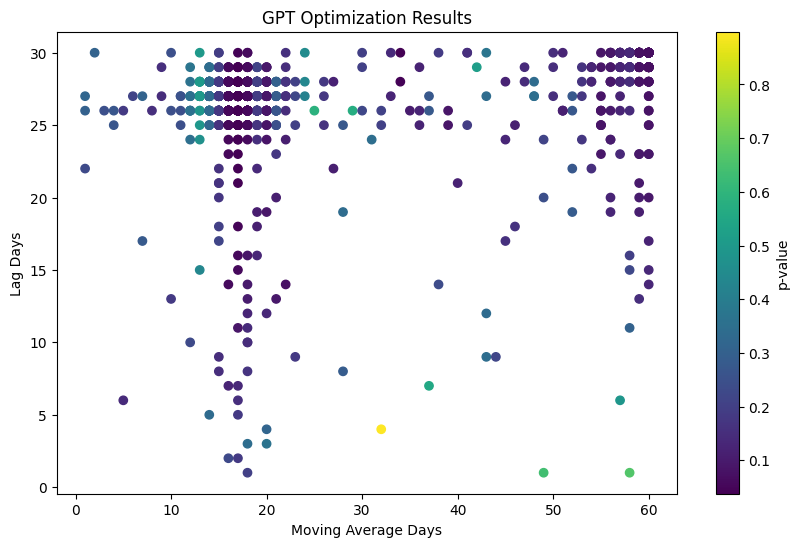

In [2]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Financials_Sentiment_Results.csv')['GPT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Technology Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('GPT Optimization Results')
plt.show()


## ENERGY

### VADER

[I 2023-07-12 15:05:12,751] A new study created in memory with name: no-name-2e24ee90-097a-491f-8383-7ea7f1796255
[I 2023-07-12 15:05:14,125] Trial 0 finished with value: 0.01359733499183533 and parameters: {'moving_average_days': 38, 'lag_days': 23}. Best is trial 0 with value: 0.01359733499183533.
[I 2023-07-12 15:05:14,700] Trial 1 finished with value: 0.018892175429350996 and parameters: {'moving_average_days': 36, 'lag_days': 17}. Best is trial 0 with value: 0.01359733499183533.
[I 2023-07-12 15:05:14,759] Trial 2 finished with value: 0.2126003054030959 and parameters: {'moving_average_days': 49, 'lag_days': 3}. Best is trial 0 with value: 0.01359733499183533.
[I 2023-07-12 15:05:15,058] Trial 3 finished with value: 0.18686739625820487 and parameters: {'moving_average_days': 46, 'lag_days': 17}. Best is trial 0 with value: 0.01359733499183533.
[I 2023-07-12 15:05:15,068] Trial 4 finished with value: 0.09879102317472478 and parameters: {'moving_average_days': 23, 'lag_days': 11}. B

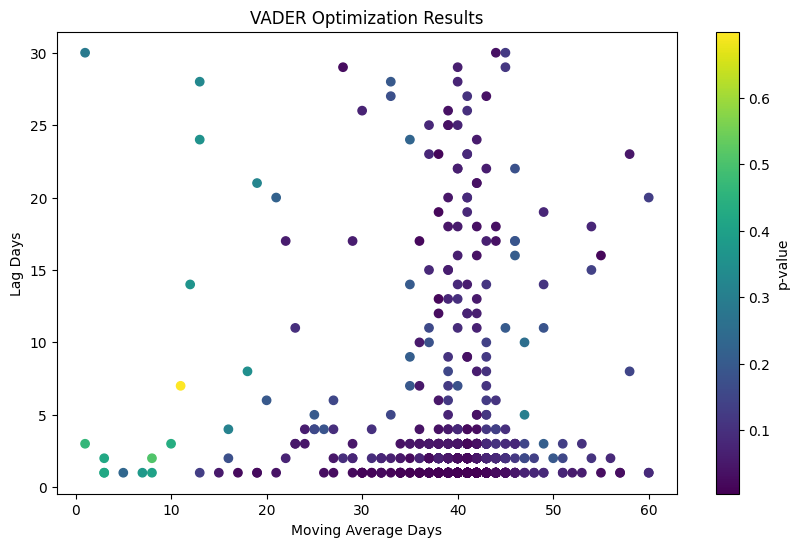

In [1]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Energy_Sentiment_Results.csv')['VADER Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Energy Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('VADER Optimization Results')
plt.show()


### FinBERT

[I 2023-07-12 15:07:39,314] A new study created in memory with name: no-name-fa0105b4-1a6d-4d24-80e4-8fc19a6b1e74
[I 2023-07-12 15:07:40,228] Trial 0 finished with value: 0.14124510772221432 and parameters: {'moving_average_days': 52, 'lag_days': 24}. Best is trial 0 with value: 0.14124510772221432.
[I 2023-07-12 15:07:40,240] Trial 1 finished with value: 0.04894148409440479 and parameters: {'moving_average_days': 39, 'lag_days': 3}. Best is trial 1 with value: 0.04894148409440479.
[I 2023-07-12 15:07:43,765] Trial 2 finished with value: 0.7041100247894461 and parameters: {'moving_average_days': 1, 'lag_days': 29}. Best is trial 1 with value: 0.04894148409440479.
[I 2023-07-12 15:07:46,062] Trial 3 finished with value: 0.18826694159879573 and parameters: {'moving_average_days': 35, 'lag_days': 27}. Best is trial 1 with value: 0.04894148409440479.
[I 2023-07-12 15:07:46,942] Trial 4 finished with value: 0.28680131229388556 and parameters: {'moving_average_days': 15, 'lag_days': 25}. Bes

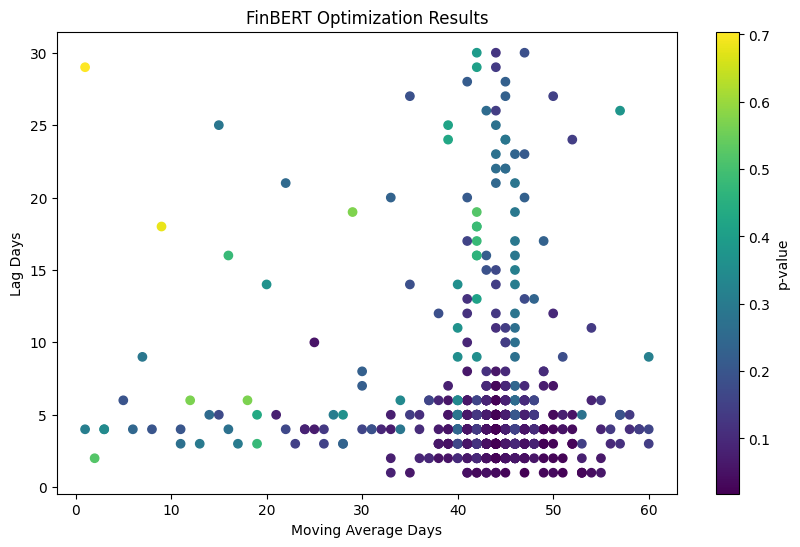

In [2]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Energy_Sentiment_Results.csv')['FinBERT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Energy Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('FinBERT Optimization Results')
plt.show()


### GPT

[I 2023-07-12 15:09:56,058] A new study created in memory with name: no-name-c1062cce-6cf6-437c-b16b-62ee8979ffbe
[I 2023-07-12 15:09:57,835] Trial 0 finished with value: 0.297071903926514 and parameters: {'moving_average_days': 47, 'lag_days': 27}. Best is trial 0 with value: 0.297071903926514.
[I 2023-07-12 15:09:57,846] Trial 1 finished with value: 0.5068909461943938 and parameters: {'moving_average_days': 2, 'lag_days': 6}. Best is trial 0 with value: 0.297071903926514.
[I 2023-07-12 15:09:58,255] Trial 2 finished with value: 0.4292254514860871 and parameters: {'moving_average_days': 52, 'lag_days': 23}. Best is trial 0 with value: 0.297071903926514.
[I 2023-07-12 15:09:58,642] Trial 3 finished with value: 0.6191055655410005 and parameters: {'moving_average_days': 5, 'lag_days': 19}. Best is trial 0 with value: 0.297071903926514.
[I 2023-07-12 15:09:58,664] Trial 4 finished with value: 0.45212772695339776 and parameters: {'moving_average_days': 8, 'lag_days': 2}. Best is trial 0 wi

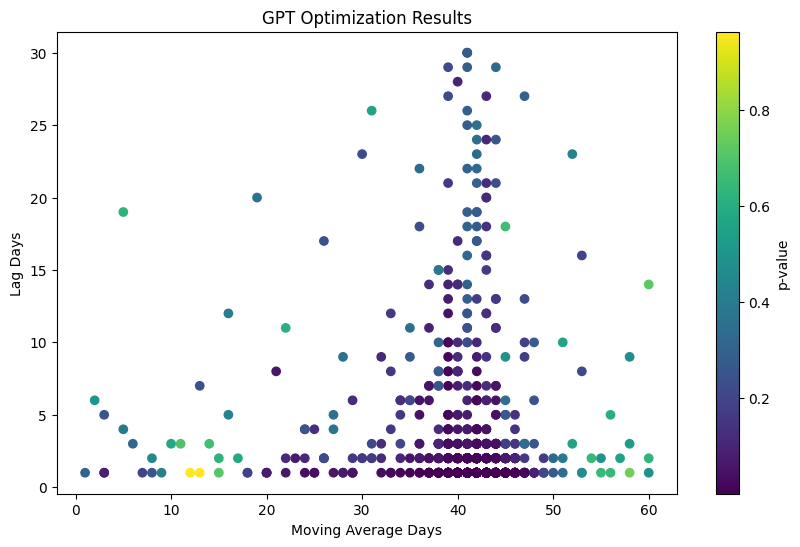

In [3]:
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load the data
sentiments = pd.read_csv('Energy_Sentiment_Results.csv')['GPT Sentiment']
returns = pd.read_csv('Portfolio_Returns_Long.csv')['Energy Return']

def objective(trial):
    # Define hyperparameters
    moving_average_days = trial.suggest_int('moving_average_days', 1, 60)
    lag_days = trial.suggest_int('lag_days', 1, 30)

    # Compute moving averages
    sentiments_ma = sentiments.rolling(moving_average_days).mean().dropna()
    returns_ma = returns.rolling(moving_average_days).mean().dropna()

    # Compute lag
    sentiments_lag = sentiments_ma.shift(lag_days).dropna()
    returns_lag = returns_ma.shift(0).dropna()

    # Make sure the series are of the same length
    min_length = min(len(sentiments_lag), len(returns_lag))
    sentiments_lag = sentiments_lag[:min_length]
    returns_lag = returns_lag[:min_length]

    # Compute Granger causality
    granger_result = grangercausalitytests(np.column_stack([returns_lag, sentiments_lag]), maxlag=lag_days, verbose=False)
    p_value = np.mean([result[0]['ssr_ftest'][1] for result in granger_result.values()])

    return p_value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# Get the results
trials = study.trials
p_values = [trial.value for trial in trials]
moving_average_days = [trial.params['moving_average_days'] for trial in trials]
lag_days = [trial.params['lag_days'] for trial in trials]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(moving_average_days, lag_days, c=p_values, cmap='viridis')
plt.colorbar(label='p-value')
plt.xlabel('Moving Average Days')
plt.ylabel('Lag Days')
plt.title('GPT Optimization Results')
plt.show()


# CROSS CORRELATION FUNCTION (CCF)

## TECHNOLOGY

### VADER

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/2114787548.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


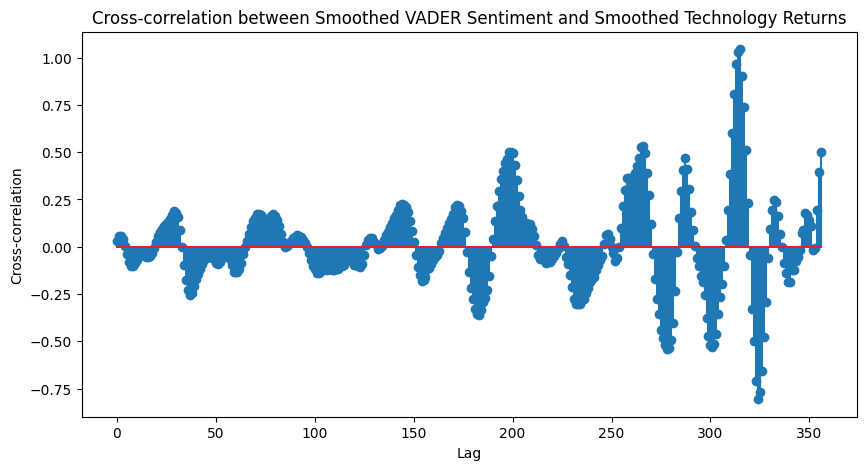

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Technology Return']
sentiment = df_sentiment['VADER Sentiment']

# Glättung der Daten durch Moving Average
window = 6
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed VADER Sentiment and Smoothed Technology Returns')
plt.show()


### FinBERT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/3074762136.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


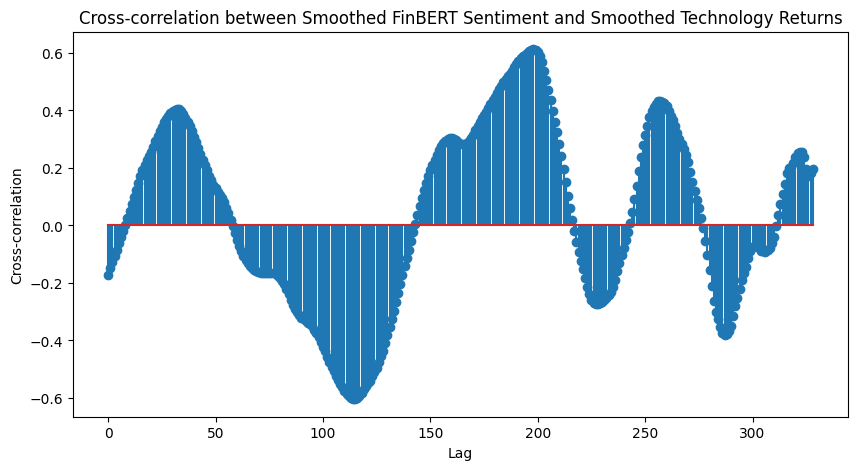

In [5]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Technology Return']
sentiment = df_sentiment['FinBERT Sentiment']

# Glättung der Daten durch Moving Average
window = 34
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed FinBERT Sentiment and Smoothed Technology Returns')
plt.show()


### GPT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/2890571754.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


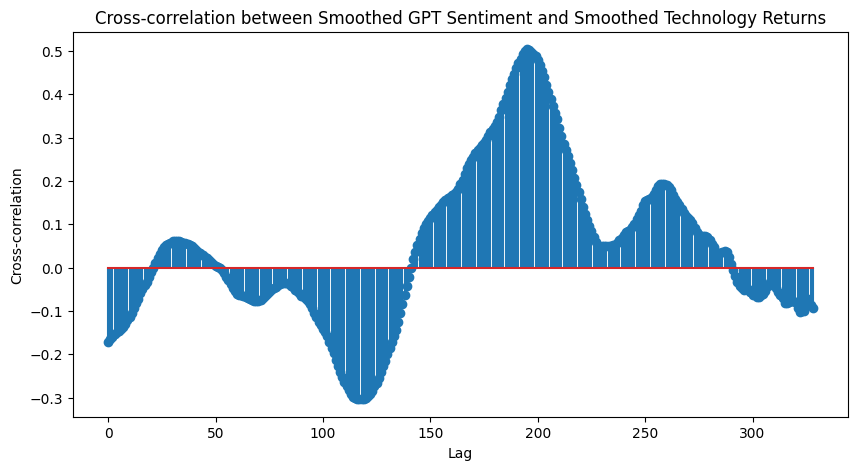

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Technology Return']
sentiment = df_sentiment['GPT Sentiment']

# Glättung der Daten durch Moving Average
window = 34
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed GPT Sentiment and Smoothed Technology Returns')
plt.show()


## FINANCIALS

### VADER

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/2687809027.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


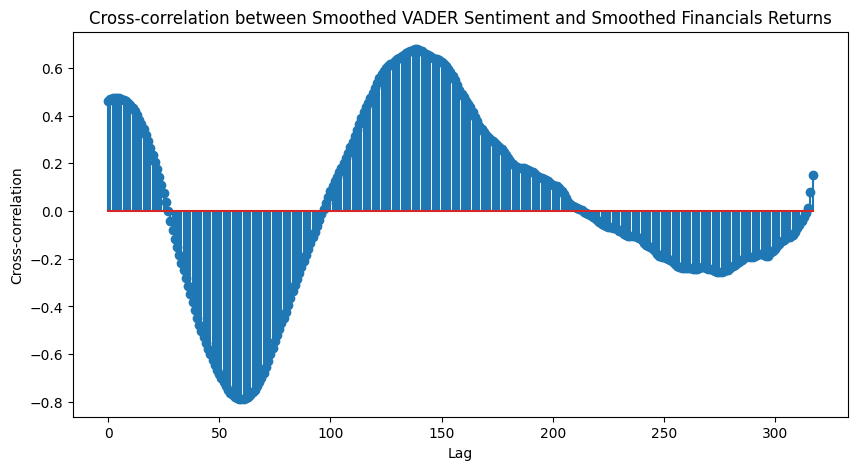

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Financials_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Financials Return']
sentiment = df_sentiment['VADER Sentiment']

# Glättung der Daten durch Moving Average
window = 45
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed VADER Sentiment and Smoothed Financials Returns')
plt.show()


### FinBERT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/3394297752.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


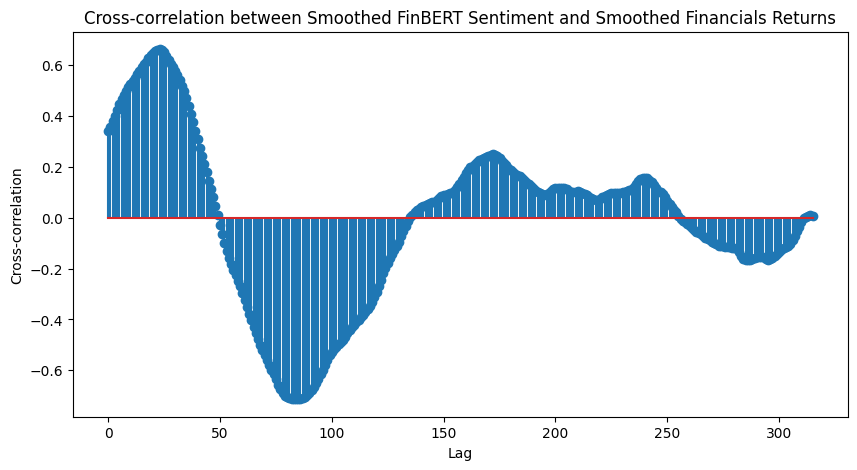

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Financials_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Financials Return']
sentiment = df_sentiment['FinBERT Sentiment']

# Glättung der Daten durch Moving Average
window = 47
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed FinBERT Sentiment and Smoothed Financials Returns')
plt.show()


### GPT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/3380197000.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


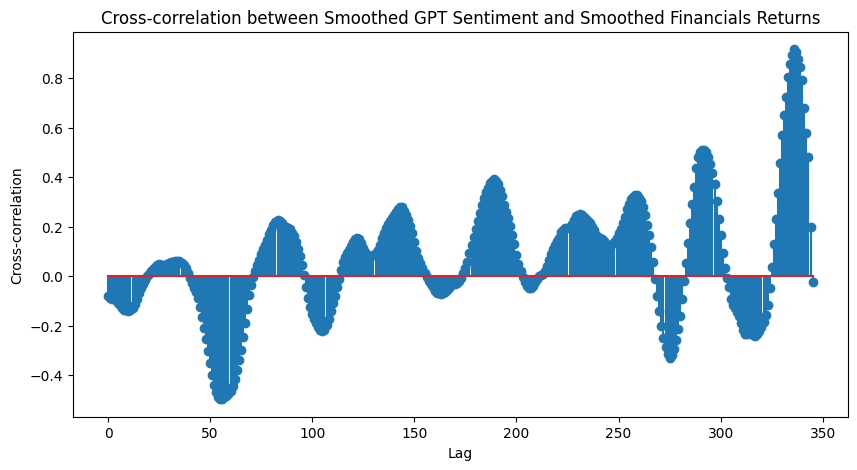

In [9]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Financials_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Financials Return']
sentiment = df_sentiment['GPT Sentiment']

# Glättung der Daten durch Moving Average
window = 17
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed GPT Sentiment and Smoothed Financials Returns')
plt.show()


## ENERGY

### VADER

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/798530326.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


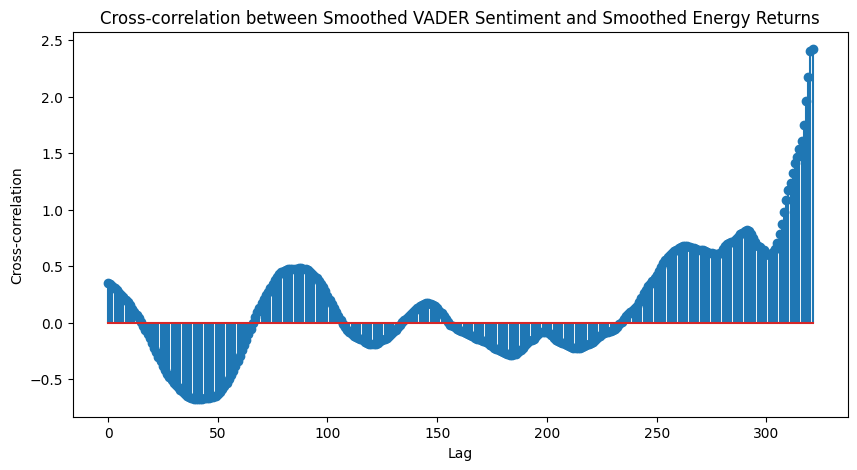

In [10]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Energy_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Energy Return']
sentiment = df_sentiment['VADER Sentiment']

# Glättung der Daten durch Moving Average
window = 41
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed VADER Sentiment and Smoothed Energy Returns')
plt.show()


### FinBERT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/2944617291.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


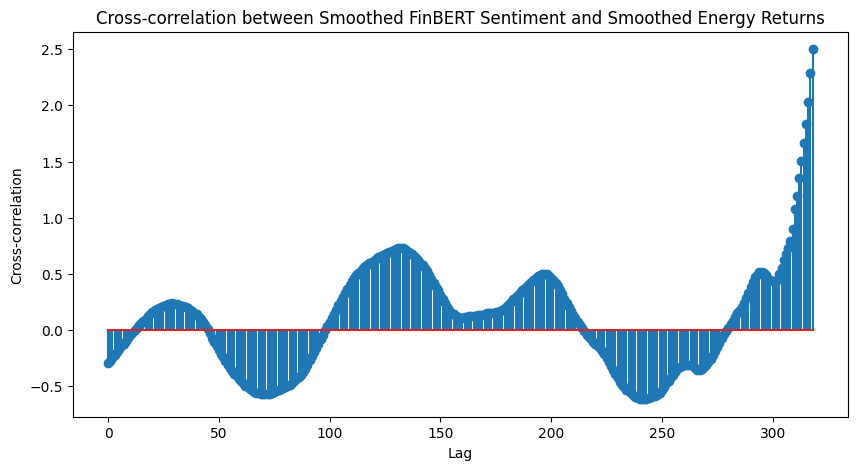

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Energy_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Energy Return']
sentiment = df_sentiment['FinBERT Sentiment']

# Glättung der Daten durch Moving Average
window = 44
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed FinBERT Sentiment and Smoothed Energy Returns')
plt.show()


### GPT

/var/folders/_2/9fsr1fps4lj4bw4c5gh4y3km0000gn/T/ipykernel_78850/2178896638.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)


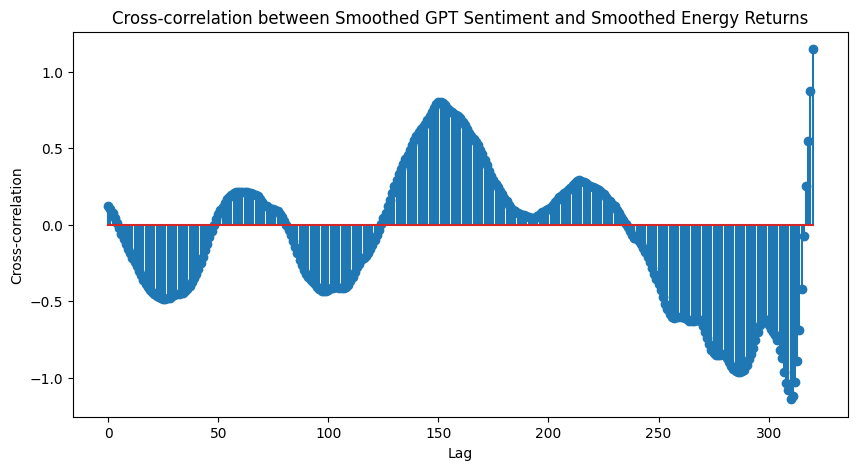

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Daten einlesen
df_returns = pd.read_csv('Portfolio_Returns_Long.csv', parse_dates=['Date'], index_col='Date')
df_sentiment = pd.read_csv('Energy_Sentiment_Results.csv', parse_dates=['Datum'], index_col='Datum')

# Wir fokussieren uns auf 'Technology Return' und 'GPT Sentiment'
returns = df_returns['Energy Return']
sentiment = df_sentiment['GPT Sentiment']

# Glättung der Daten durch Moving Average
window = 42
returns_ma = returns.rolling(window).mean().dropna()
sentiment_ma = sentiment.rolling(window).mean().dropna()

# Kreuzkorrelationsfunktion berechnen
cross_correlation = ccf(sentiment_ma, returns_ma)

# Graph der Kreuzkorrelation
plt.figure(figsize=(10,5))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Smoothed GPT Sentiment and Smoothed Energy Returns')
plt.show()


# ROLLING CORRELATION

## TECHNOLOGY

### NO SHIFT

     Sentiment   Returns  Rolling Correlation
0     0.491525  0.010216                  NaN
1     0.491803 -0.007294                  NaN
2     0.346939 -0.033189                  NaN
3     0.344262 -0.002346                  NaN
4     0.375000 -0.003568                  NaN
5     0.357143 -0.003568                  NaN
6     0.315789 -0.003568                  NaN
7     0.375000 -0.001387                  NaN
8     0.458333  0.010880                  NaN
9     0.333333  0.005625                  NaN
10    0.543478 -0.022267                  NaN
11    0.340000  0.008953                  NaN
12    0.326087  0.008953                  NaN
13    0.343750  0.008953                  NaN
14    0.400000  0.008953                  NaN
15    0.434783 -0.023153                  NaN
16    0.385714 -0.007905                  NaN
17    0.260870 -0.009220                  NaN
18    0.425532 -0.024101                  NaN
19    0.297297 -0.024101                  NaN
20    0.230769 -0.024101          

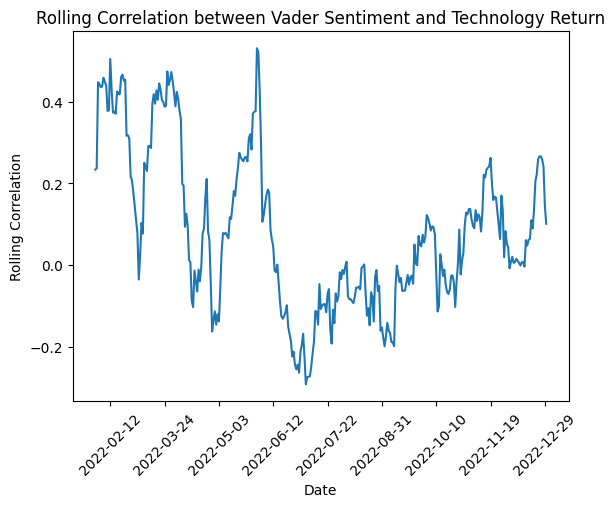

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'VADER Sentiment'
returns_column = 'Technology Return'

# Rolling Correlation berechnen
rolling_correlation = df_sentiment[sentiment_column].rolling(window=30).corr(df_returns[returns_column])

# Daten und Rolling Correlation anzeigen
data = pd.concat([df_sentiment[sentiment_column], df_returns[returns_column], rolling_correlation], axis=1)
data.columns = ['Sentiment', 'Returns', 'Rolling Correlation']
pd.set_option('display.max_rows', None)  # Zeigt alle Zeilen im DataFrame an
print(data)

# Plot erstellen
plt.plot(df_returns['Date'], rolling_correlation)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Rolling Correlation between Vader Sentiment and Technology Return')
plt.xticks(rotation=45)

# Anpassen der Datumsbeschriftungen auf der X-Achse
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Ändern Sie die 6 entsprechend Ihren Anforderungen

plt.show()


### SHIFT

### VADER

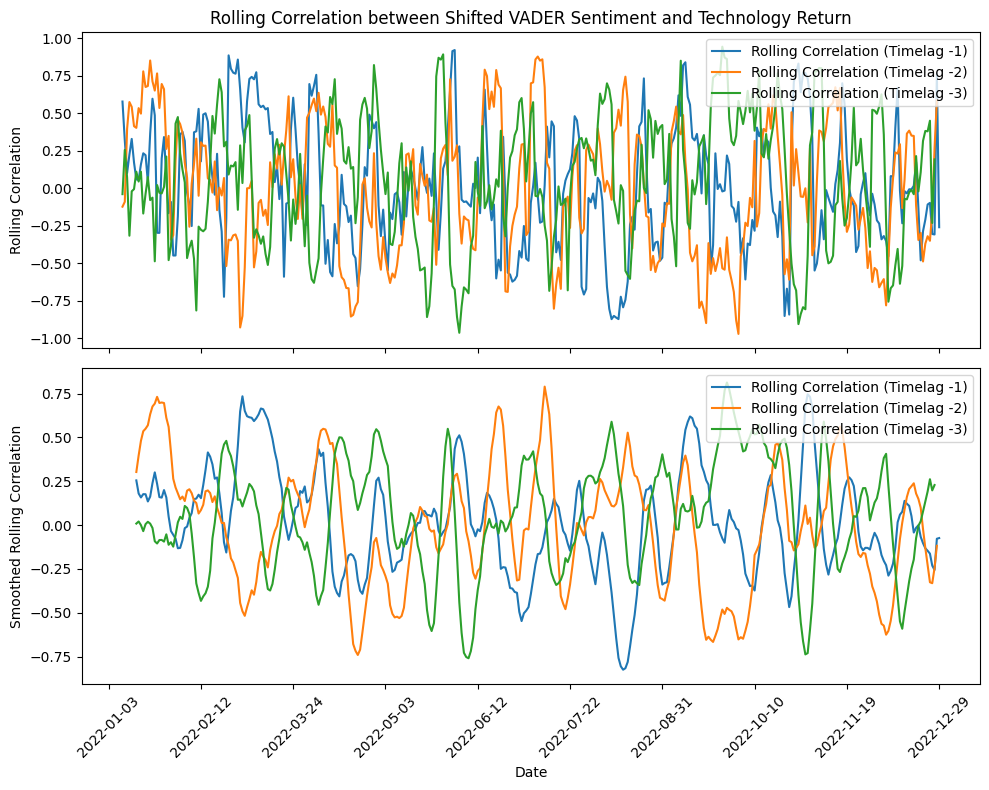

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'VADER Sentiment'
returns_column = 'Technology Return'

# Daten und Rolling Correlation für verschiedene Timelags berechnen
timelags = range(-1, -4, -1)
correlation_data = pd.DataFrame()
for timelag in timelags:
    shifted_sentiment = df_sentiment[sentiment_column].shift(timelag)
    rolling_correlation = shifted_sentiment.rolling(window=7).corr(df_returns[returns_column])
    
    # Daten und Rolling Correlation zum DataFrame hinzufügen
    correlation_data[f'Rolling Correlation (Timelag {timelag})'] = rolling_correlation

# Speichern der Ergebnisse in eine CSV-Datei
correlation_data.to_csv('Rolling_Correlation_Results.csv', index=False)

# Plot erstellen
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot der Originaldaten
for column in correlation_data.columns:
    ax1.plot(df_returns['Date'], correlation_data[column], label=column)

ax1.set_ylabel('Rolling Correlation')
ax1.set_title('Rolling Correlation between Shifted VADER Sentiment and Technology Return')
ax1.legend(loc='upper right')

# Plot der geglätteten Daten
smoothed_data = correlation_data.rolling(window=7).mean()
for column in smoothed_data.columns:
    ax2.plot(df_returns['Date'], smoothed_data[column], label=column)

ax2.set_xlabel('Date')
ax2.set_ylabel('Smoothed Rolling Correlation')
ax2.legend(loc='upper right')

# Anpassen der Datumsbeschriftungen auf der X-Achse
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.tight_layout()
plt.show()


### FinBERT

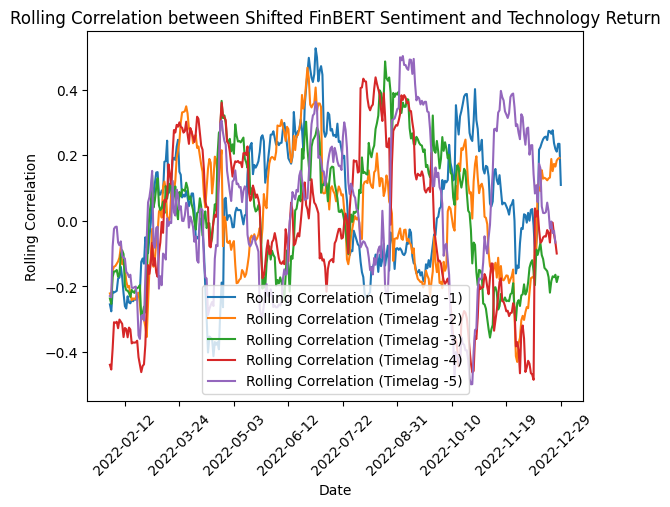

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'FinBERT Sentiment'
returns_column = 'Technology Return'

# Daten und Rolling Correlation für verschiedene Timelags berechnen
timelags = range(-1, -6, -1)
correlation_data = pd.DataFrame()
for timelag in timelags:
    shifted_sentiment = df_sentiment[sentiment_column].shift(timelag)
    rolling_correlation = shifted_sentiment.rolling(window=30).corr(df_returns[returns_column])
    
    # Daten und Rolling Correlation zum DataFrame hinzufügen
    correlation_data[f'Rolling Correlation (Timelag {timelag})'] = rolling_correlation

# Speichern der Ergebnisse in eine CSV-Datei
correlation_data.to_csv('Rolling_Correlation_Results.csv', index=False)

# Plot erstellen
plt.plot(df_returns['Date'], correlation_data)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Rolling Correlation between Shifted FinBERT Sentiment and Technology Return')
plt.legend(correlation_data.columns)
plt.xticks(rotation=45)

# Anpassen der Datumsbeschriftungen auf der X-Achse
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()


### GPT

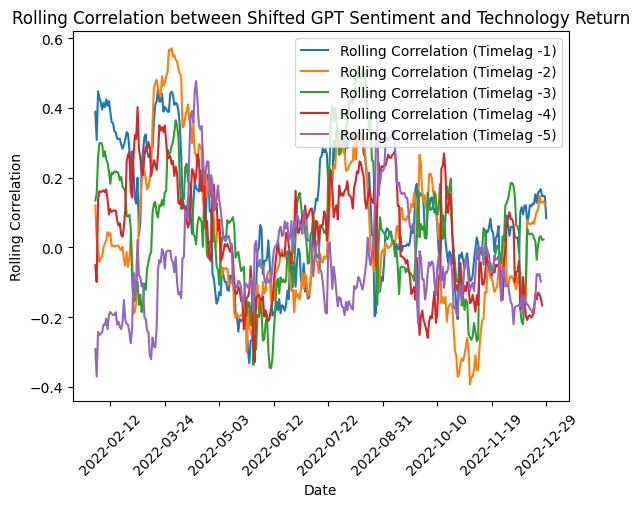

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten einlesen
df_sentiment = pd.read_csv('Technology_Sentiment_Results.csv')
df_returns = pd.read_csv('Portfolio_Returns_Long.csv')

# Gewünschte Spalten auswählen
sentiment_column = 'GPT Sentiment'
returns_column = 'Technology Return'

# Daten und Rolling Correlation für verschiedene Timelags berechnen
timelags = range(-1, -6, -1)
correlation_data = pd.DataFrame()
for timelag in timelags:
    shifted_sentiment = df_sentiment[sentiment_column].shift(timelag)
    rolling_correlation = shifted_sentiment.rolling(window=30).corr(df_returns[returns_column])
    
    # Daten und Rolling Correlation zum DataFrame hinzufügen
    correlation_data[f'Rolling Correlation (Timelag {timelag})'] = rolling_correlation

# Speichern der Ergebnisse in eine CSV-Datei
correlation_data.to_csv('Rolling_Correlation_Results.csv', index=False)

# Plot erstellen
plt.plot(df_returns['Date'], correlation_data)
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.title('Rolling Correlation between Shifted GPT Sentiment and Technology Return')
plt.legend(correlation_data.columns)
plt.xticks(rotation=45)

# Anpassen der Datumsbeschriftungen auf der X-Achse
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()


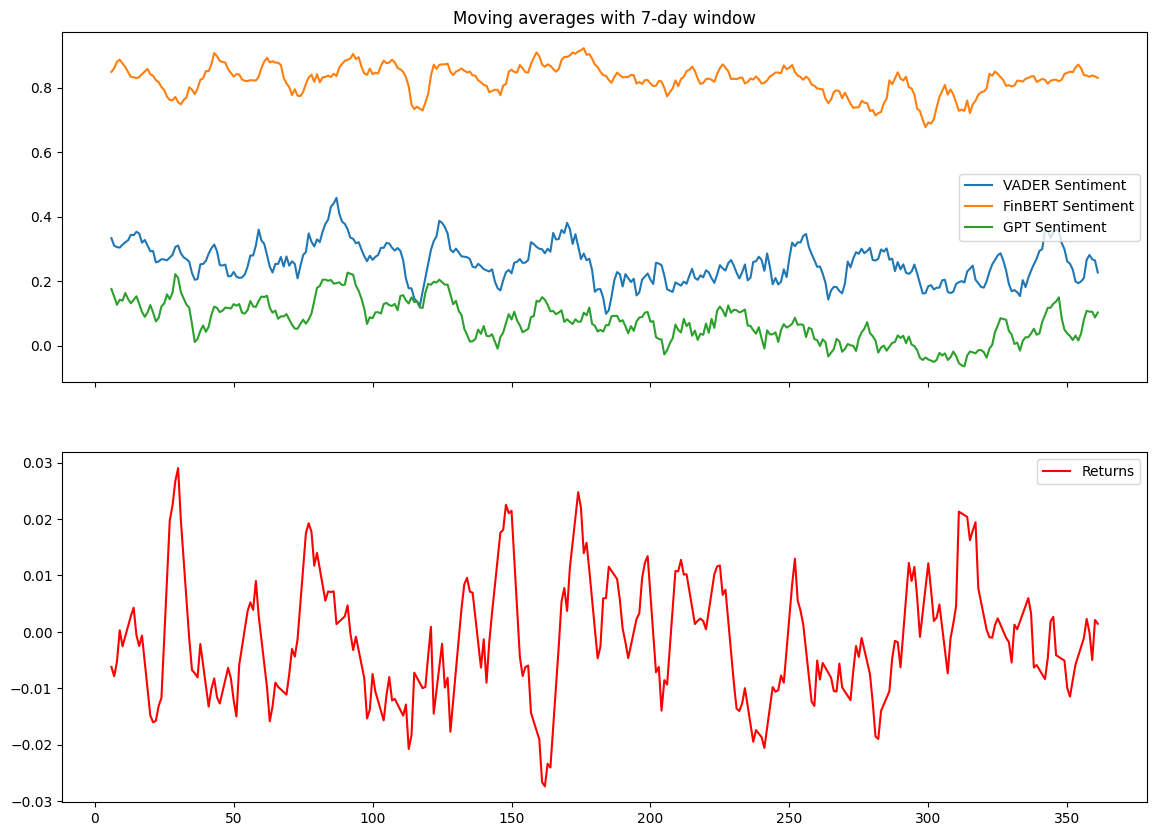

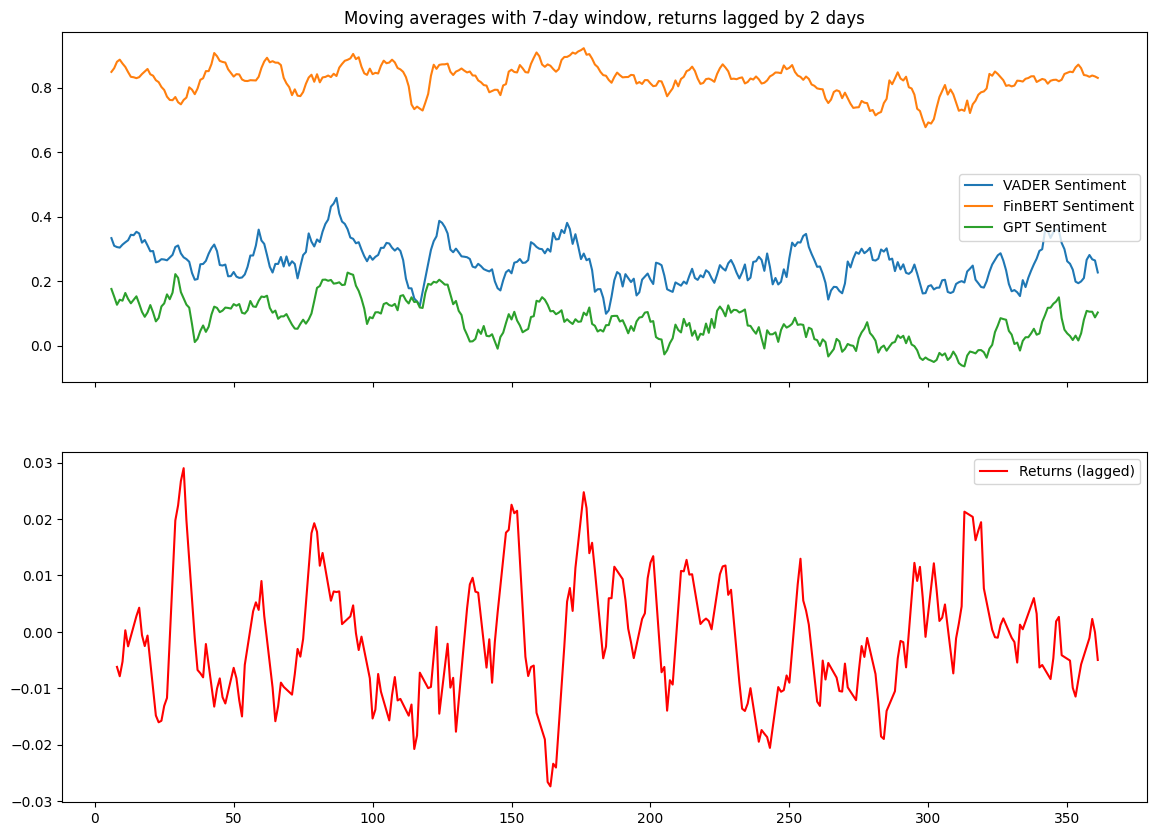

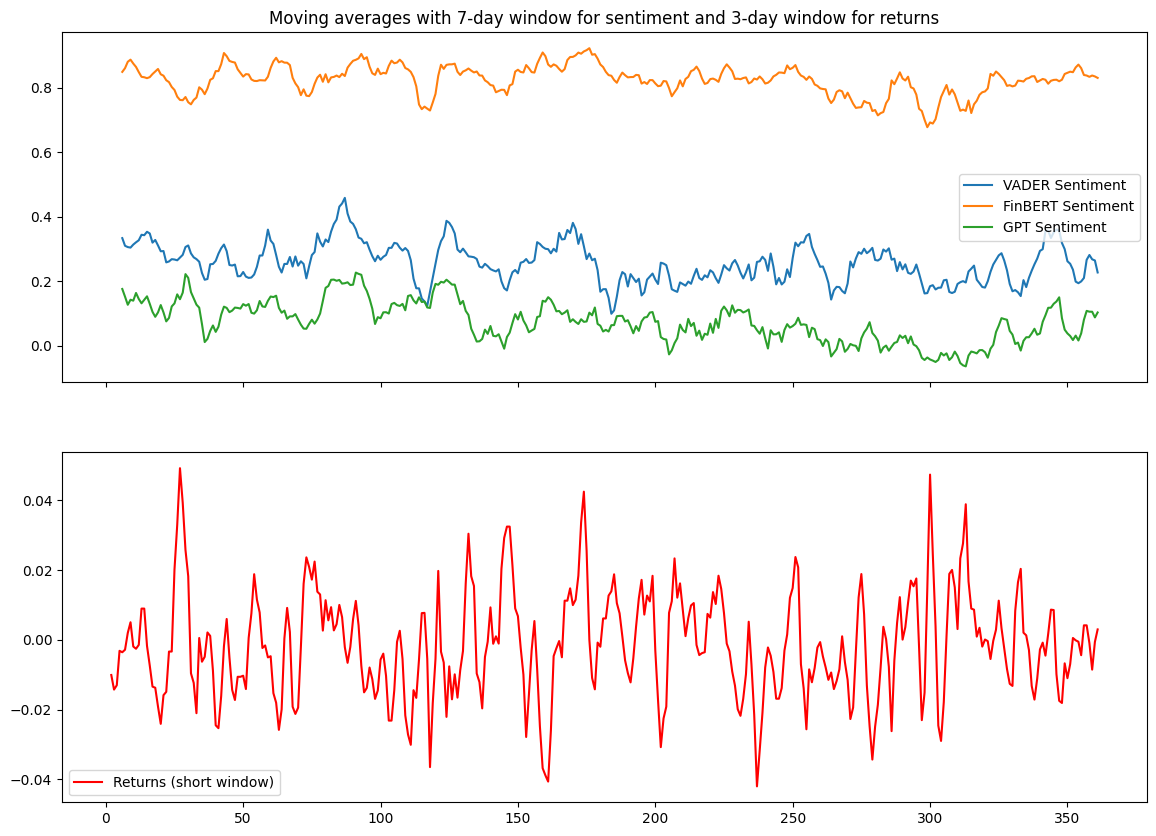

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Technology.csv')
returns_data = pd.read_csv('Portfolio_Returns_Long.csv')

# Extract relevant columns
sentiments = sentiment_data[['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data['Technology Return']

# Compute the moving averages
sentiments_rolling = sentiments.rolling(window=7).mean()
returns_rolling = returns.rolling(window=7).mean()

# Plot the results (1st Requirement)
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax[0].plot(sentiments_rolling['VADER Sentiment'], label='VADER Sentiment')
ax[0].plot(sentiments_rolling['FinBERT Sentiment'], label='FinBERT Sentiment')
ax[0].plot(sentiments_rolling['GPT Sentiment'], label='GPT Sentiment')
ax[0].legend()
ax[0].set_title('Moving averages with 7-day window')

ax[1].plot(returns_rolling, label='Returns', color='red')
ax[1].legend()
plt.show()

# Introduce a 2-day lag in the returns
returns_lagged = returns.shift(2)
returns_lagged_rolling = returns_lagged.rolling(window=7).mean()

# Plot the results (2nd Requirement)
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax[0].plot(sentiments_rolling['VADER Sentiment'], label='VADER Sentiment')
ax[0].plot(sentiments_rolling['FinBERT Sentiment'], label='FinBERT Sentiment')
ax[0].plot(sentiments_rolling['GPT Sentiment'], label='GPT Sentiment')
ax[0].legend()
ax[0].set_title('Moving averages with 7-day window, returns lagged by 2 days')

ax[1].plot(returns_lagged_rolling, label='Returns (lagged)', color='red')
ax[1].legend()
plt.show()

# Compute the moving average with a 3-day window for returns
returns_rolling_short = returns.rolling(window=3).mean()

# Plot the results (3rd Requirement)
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

ax[0].plot(sentiments_rolling['VADER Sentiment'], label='VADER Sentiment')
ax[0].plot(sentiments_rolling['FinBERT Sentiment'], label='FinBERT Sentiment')
ax[0].plot(sentiments_rolling['GPT Sentiment'], label='GPT Sentiment')
ax[0].legend()
ax[0].set_title('Moving averages with 7-day window for sentiment and 3-day window for returns')

ax[1].plot(returns_rolling_short, label='Returns (short window)', color='red')
ax[1].legend()
plt.show()


Merged Data Size: (362, 5)

Merged Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               362 non-null    object 
 1   VADER Sentiment    362 non-null    float64
 2   FinBERT Sentiment  362 non-null    float64
 3   GPT Sentiment      362 non-null    float64
 4   Financials Return  362 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.0+ KB
None

Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.211326           4.154696       0.193370
std           2.541393           3.511908       1.800292
min          -6.000000          -1.000000      -8.000000
25%           0.000000           2.000000      -1.000000
50%           1.000000           3.000000       0.000000
75%           2.000000

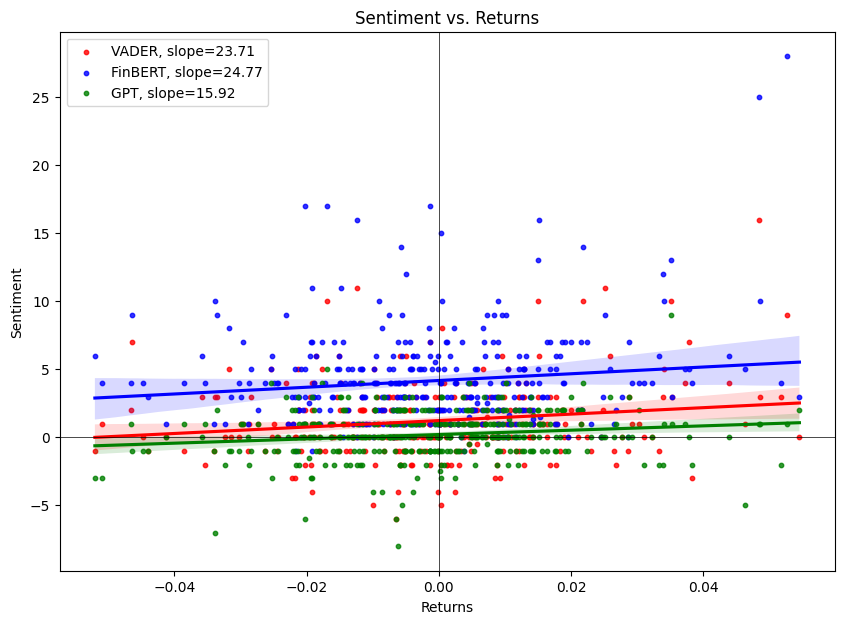


Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    108      163   82
Quadrant 2    102      183   70
Quadrant 3     41        3   72
Quadrant 4     28        1   44


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Financials Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Print the size of the merged data
print(f"Merged Data Size: {merged_data.shape}")

# Display detailed information about the merged data
print("\nMerged Data Information:")
print(merged_data.info())

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10,7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    # Compute slope
    slope, _, _, _, _ = stats.linregress(merged_data['Financials Return'], merged_data[sentiment])
    
    # Create regression plot
    sns.regplot(x=merged_data['Financials Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s':10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Financials Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Financials Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Financials Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Financials Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Sentiment vs. Returns')
plt.legend()
plt.show()

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)


Merged Data Size: (362, 5)

Merged Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               362 non-null    object 
 1   VADER Sentiment    362 non-null    float64
 2   FinBERT Sentiment  362 non-null    float64
 3   GPT Sentiment      362 non-null    float64
 4   Energy Return      362 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.0+ KB
None

Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.614641           4.480663       1.382597
std           2.337645           4.271228       1.976886
min          -4.000000          -2.000000      -2.000000
25%           0.000000           2.000000       0.000000
50%           1.000000           3.000000       1.000000
75%           3.000000

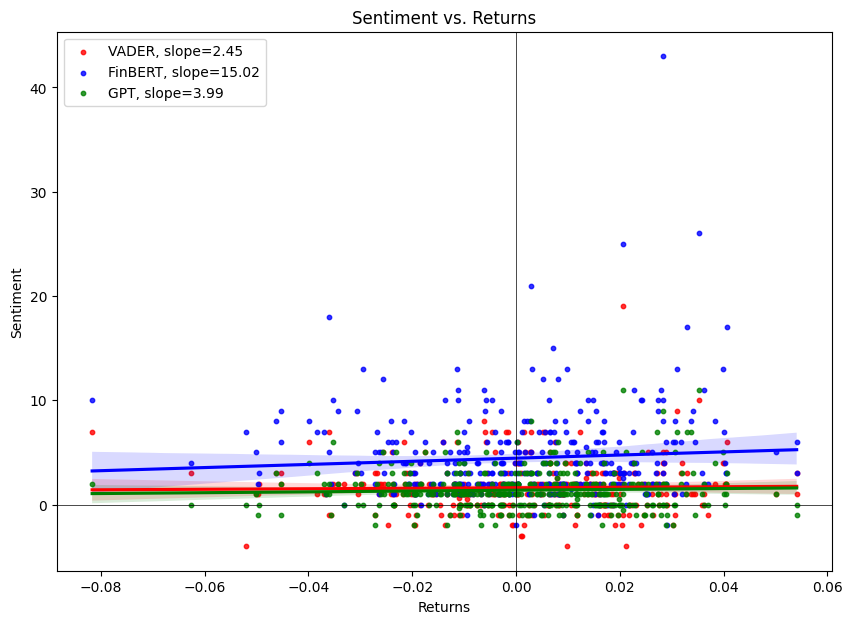


Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    146      193  129
Quadrant 2    110      153  104
Quadrant 3     21        1   21
Quadrant 4     29        6   24


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Energy Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Print the size of the merged data
print(f"Merged Data Size: {merged_data.shape}")

# Display detailed information about the merged data
print("\nMerged Data Information:")
print(merged_data.info())

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10,7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    # Compute slope
    slope, _, _, _, _ = stats.linregress(merged_data['Energy Return'], merged_data[sentiment])
    
    # Create regression plot
    sns.regplot(x=merged_data['Energy Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s':10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Energy Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Energy Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Energy Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Energy Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Sentiment vs. Returns')
plt.legend()
plt.show()

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)


Merged Data Size: (362, 5)

Merged Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               362 non-null    object 
 1   VADER Sentiment    362 non-null    float64
 2   FinBERT Sentiment  362 non-null    float64
 3   GPT Sentiment      362 non-null    float64
 4   Technology Return  362 non-null    float64
dtypes: float64(4), object(1)
memory usage: 17.0+ KB
None

Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean         13.591160          45.668508       3.801105
std           8.713903          23.787391       8.590673
min          -4.000000          11.000000     -34.000000
25%           8.000000          31.250000       0.000000
50%          13.000000          41.000000       3.000000
75%          17.000000

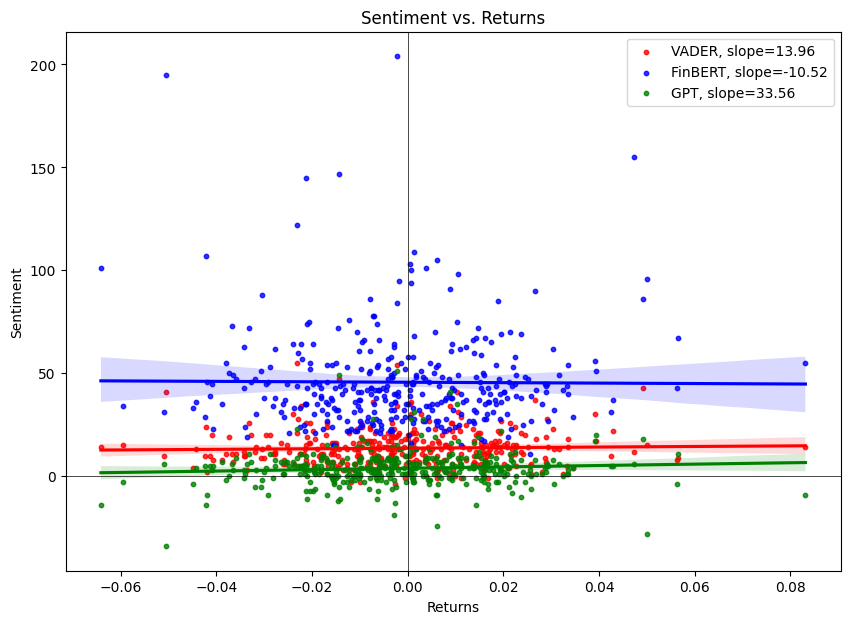


Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    160      166  121
Quadrant 2    191      196  136
Quadrant 3      4        0   50
Quadrant 4      4        0   37


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Technology Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Print the size of the merged data
print(f"Merged Data Size: {merged_data.shape}")

# Display detailed information about the merged data
print("\nMerged Data Information:")
print(merged_data.info())

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10,7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    # Compute slope
    slope, _, _, _, _ = stats.linregress(merged_data['Technology Return'], merged_data[sentiment])
    
    # Create regression plot
    sns.regplot(x=merged_data['Technology Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s':10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Technology Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Technology Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Technology Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Technology Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Sentiment vs. Returns')
plt.legend()
plt.show()

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)


Fehlende Werte:
Date                    0
VADER Sentiment         0
FinBERT Sentiment       0
GPT Sentiment           0
Technology Return       0
Financials Return       0
Energy Return           0
Technology Portfolio    0
Financials Portfolio    0
Energy Portfolio        0
dtype: int64


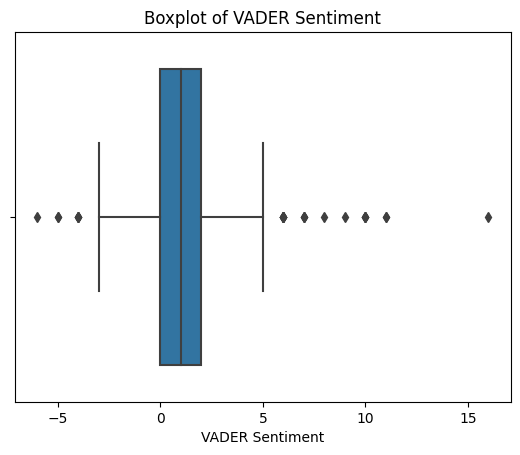

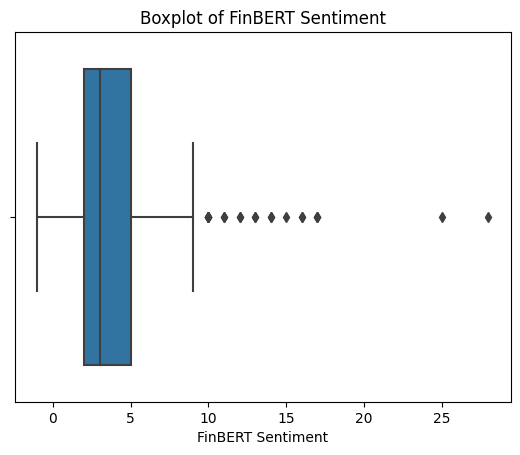

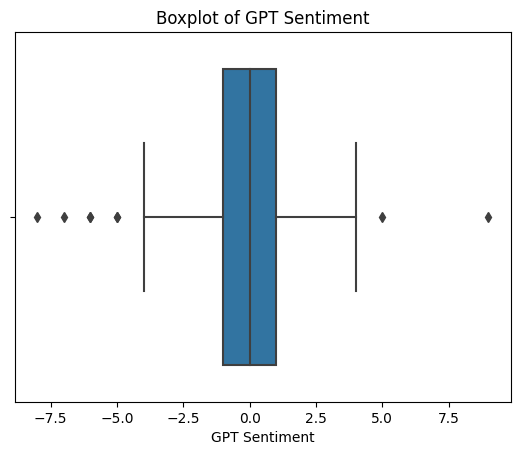

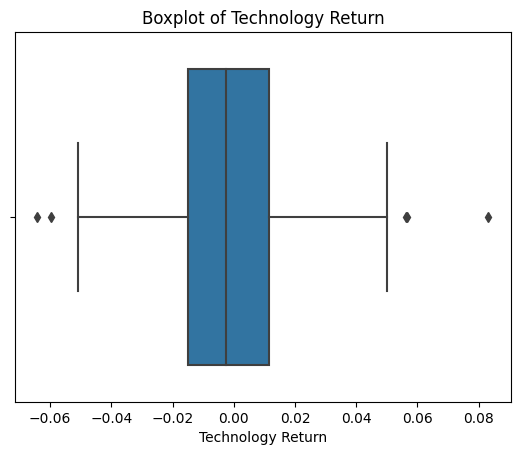

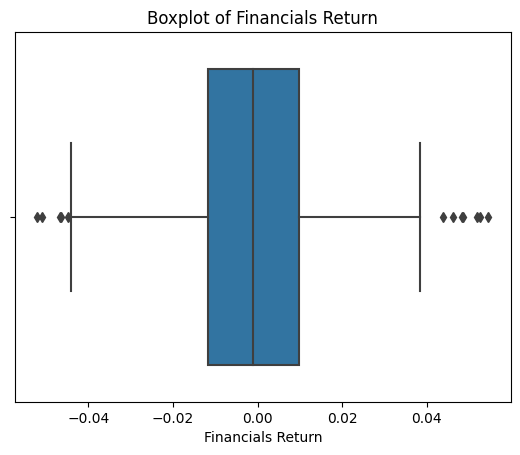

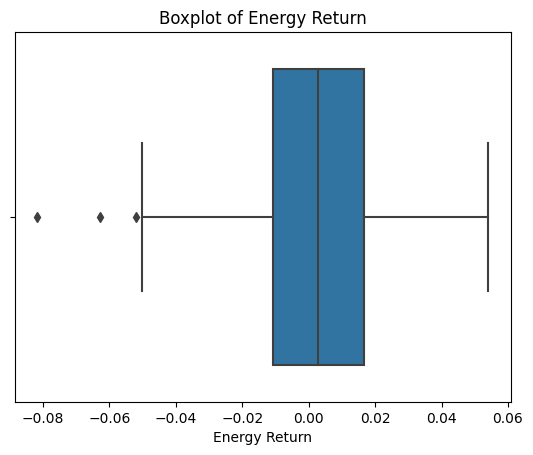

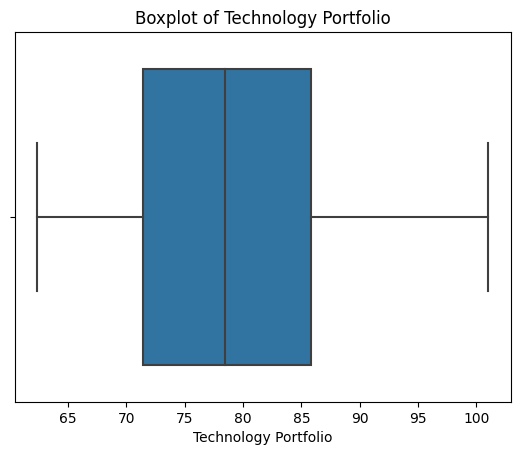

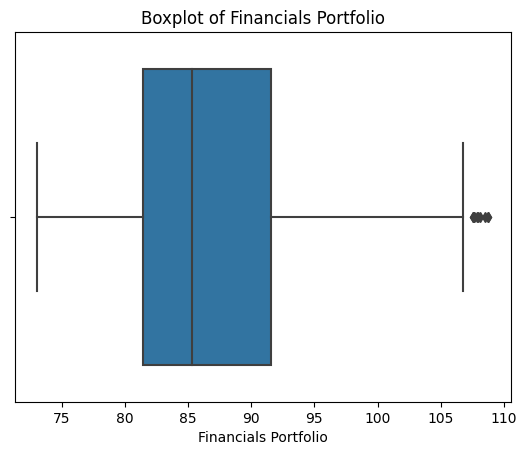

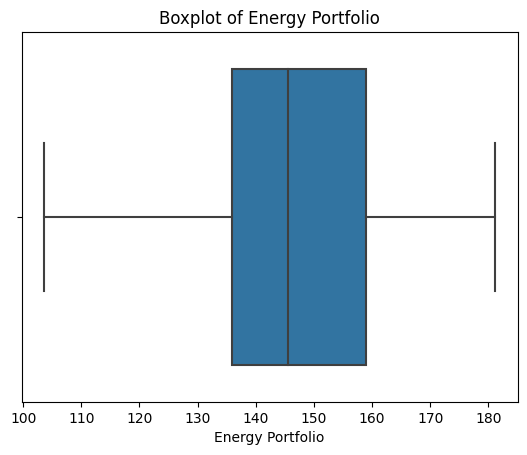

Stationaritätstest für VADER Sentiment:
ADF Statistic: -6.85058097685186
p-value: 1.698374012219976e-09
Stationaritätstest für FinBERT Sentiment:
ADF Statistic: -7.813474563447515
p-value: 6.9693446706195505e-12
Stationaritätstest für GPT Sentiment:
ADF Statistic: -17.008184757540057
p-value: 8.629951992486802e-30
Stationaritätstest für Technology Return:
ADF Statistic: -15.030018546558223
p-value: 9.934260470083271e-28
Stationaritätstest für Financials Return:
ADF Statistic: -12.850235645389287
p-value: 5.372144165407438e-24
Stationaritätstest für Energy Return:
ADF Statistic: -12.773445906624955
p-value: 7.682821748555375e-24
Stationaritätstest für Technology Portfolio:
ADF Statistic: -2.188027375611734
p-value: 0.21061948995084806
Stationaritätstest für Financials Portfolio:
ADF Statistic: -1.88495012964595
p-value: 0.33917382760701476
Stationaritätstest für Energy Portfolio:
ADF Statistic: -1.9742320368794621
p-value: 0.29798446627119524


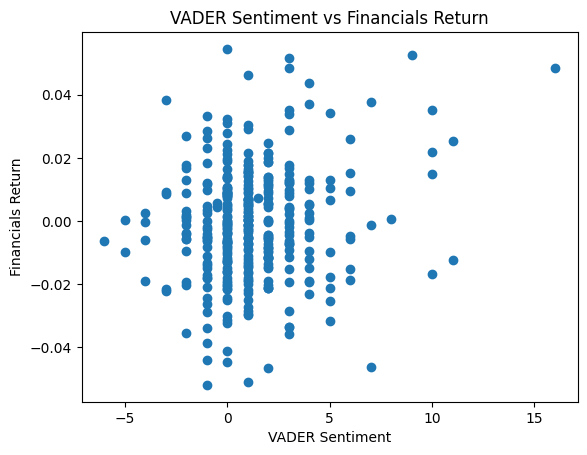

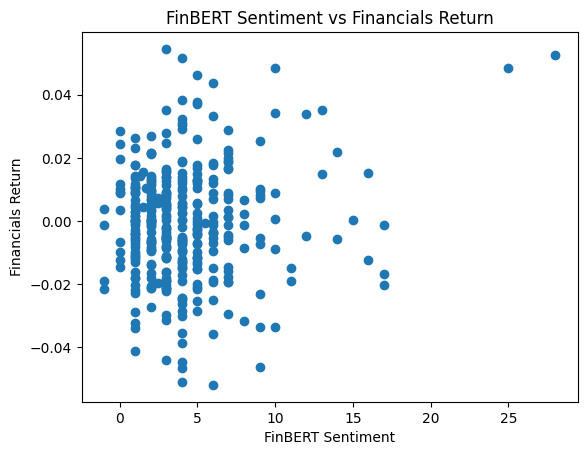

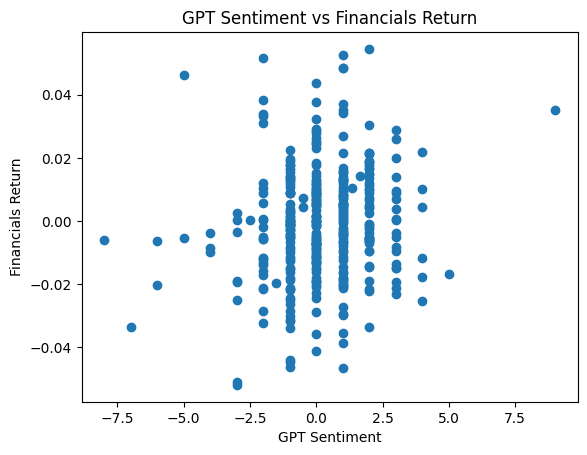

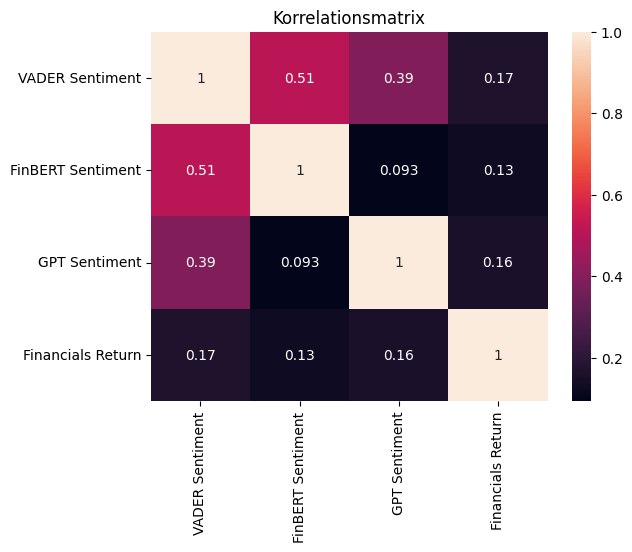

Stationaritätstest für Technology Portfolio nach Differenzierung:
ADF Statistic: -19.58542419860255
p-value: 0.0
Stationaritätstest für Financials Portfolio nach Differenzierung:
ADF Statistic: -18.07116041011657
p-value: 2.603878431610592e-30
Stationaritätstest für Energy Portfolio nach Differenzierung:
ADF Statistic: -17.059973485052918
p-value: 7.959201546835058e-30


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Daten laden
sentiment_data = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Spalten zusammenführen
merged_data = pd.merge(sentiment_data, returns_data, on='Date')

# Fehlende Werte prüfen
print("Fehlende Werte:")
print(merged_data.isnull().sum())

# Ausreißer mit Boxplots analysieren (ohne Date-Spalte)
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.boxplot(x=merged_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Überprüfung auf Stationarität
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

for column in merged_data.columns[1:]:
    print(f"Stationaritätstest für {column}:")
    test_stationarity(merged_data[column])

# Scatterplots für den Zusammenhang zwischen Sentiments und Renditen
for sentiment in ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']:
    plt.scatter(merged_data[sentiment], merged_data['Financials Return'])
    plt.xlabel(sentiment)
    plt.ylabel('Financials Return')
    plt.title(f'{sentiment} vs Financials Return')
    plt.show()

# Korrelationsmatrix
correlation_matrix = merged_data[['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment', 'Financials Return']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Korrelationsmatrix")
plt.show()

# Ergänzender Code zur Differenzierung nicht-stationärer Spalten (falls erforderlich)
non_stationary_columns = ['Technology Portfolio', 'Financials Portfolio', 'Energy Portfolio']
for column in non_stationary_columns:
    merged_data[column] = merged_data[column].diff().dropna()

# Erneute Prüfung der Stationarität für die differenzierten Spalten
for column in non_stationary_columns:
    print(f"Stationaritätstest für {column} nach Differenzierung:")
    test_stationarity(merged_data[column].dropna())  # dropna, da die Differenzierung NaN-Werte für die erste Zeile erzeugt


In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import grangercausalitytests

# Liste der Sentiments und Returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# maxlag für den Granger-Kausalitätstest
maxlag = 4

# DataFrame 'merged_data' mit den Sentiments und Returns (definiere diesen entsprechend deinen Daten)

# Exponentielle Glättung für die Sentiments
for sentiment in sentiments:
    model = ExponentialSmoothing(merged_data[sentiment], trend='add')
    fit = model.fit()
    merged_data[sentiment + '_smoothed'] = fit.fittedvalues

# Granger-Kausalitätstest für die geglätteten Sentiments und die Returns
for sentiment in sentiments:
    for return_column in returns:
        print(f"Granger-Kausalitätstest zwischen {sentiment}_smoothed und {return_column}:")
        test_result = grangercausalitytests(merged_data[[sentiment + '_smoothed', return_column]], maxlag=maxlag, verbose=True)
        print("\n" + "-"*50 + "\n")


Granger-Kausalitätstest zwischen VADER Sentiment_smoothed und Technology Return:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3305  , p=0.0215  , df_denom=358, df_num=1
ssr based chi2 test:   chi2=5.3752  , p=0.0204  , df=1
likelihood ratio test: chi2=5.3355  , p=0.0209  , df=1
parameter F test:         F=5.3305  , p=0.0215  , df_denom=358, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2634  , p=0.0394  , df_denom=355, df_num=2
ssr based chi2 test:   chi2=6.6188  , p=0.0365  , df=2
likelihood ratio test: chi2=6.5587  , p=0.0377  , df=2
parameter F test:         F=3.2634  , p=0.0394  , df_denom=355, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0658  , p=0.1044  , df_denom=352, df_num=3
ssr based chi2 test:   chi2=6.3206  , p=0.0970  , df=3
likelihood ratio test: chi2=6.2656  , p=0.0994  , df=3
parameter F test:         F=2.0658  , p=0.1044  , df_denom=352, df_num=3

Granger Caus

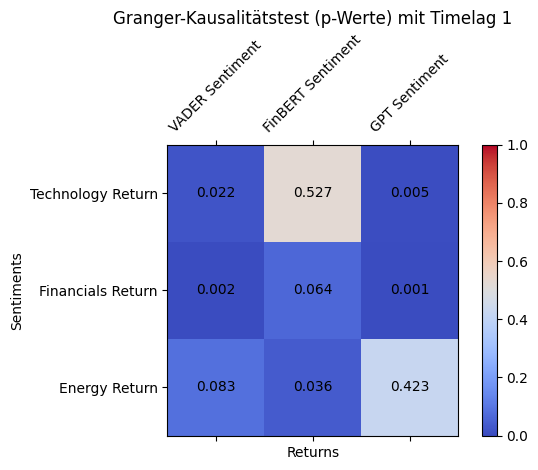

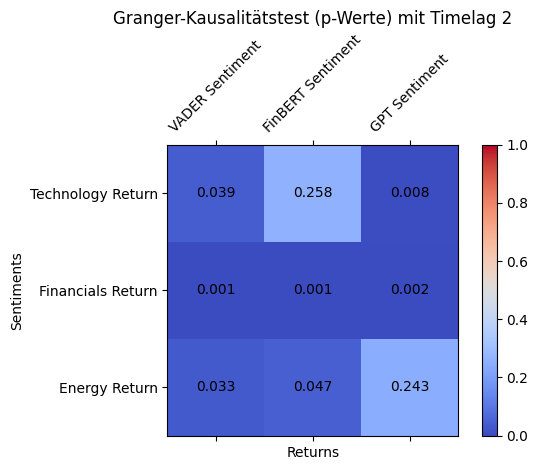

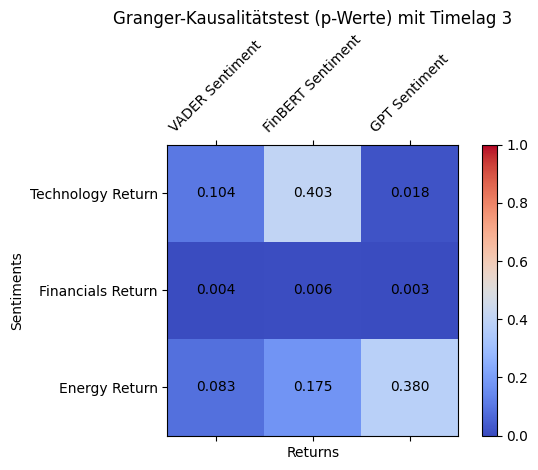

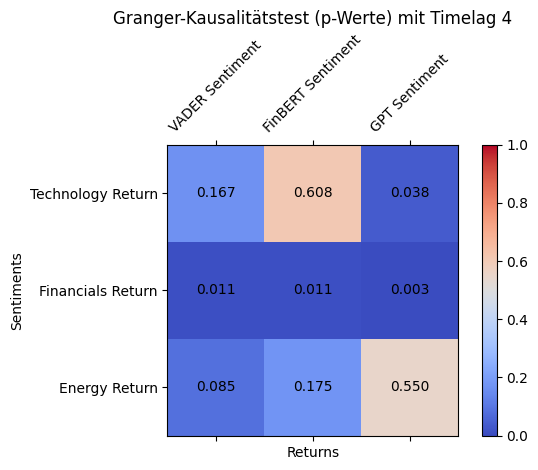

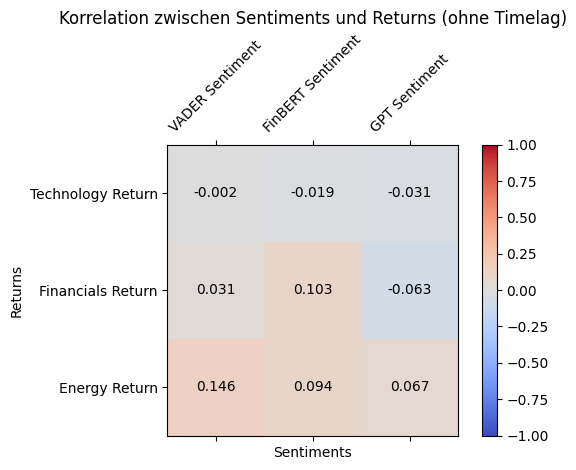

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import grangercausalitytests

# Liste der Sentiments und Returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# Liste der betrachteten Timelags
timelags = [1, 2, 3, 4]

# DataFrame 'merged_data' mit den Sentiments und Returns (definiere diesen entsprechend deinen Daten)

# Funktion, um den Granger-Kausalitätstest für ein bestimmtes Timelag durchzuführen
def granger_causality_test(sentiment, return_column, lag):
    test_result = grangercausalitytests(merged_data[[sentiment + '_smoothed', return_column]], maxlag=lag, verbose=False)
    return test_result[lag][0]['ssr_ftest'][1]

# Exponentielle Glättung für die Sentiments
for sentiment in sentiments:
    model = ExponentialSmoothing(merged_data[sentiment], trend='add')
    fit = model.fit()
    merged_data[sentiment + '_smoothed'] = fit.fittedvalues

# Granger-Kausalitätstest für die geglätteten Sentiments und die Returns mit verschiedenen Timelags
results_timelag = {}
for lag in timelags:
    results_timelag[lag] = {}
    for sentiment in sentiments:
        results_timelag[lag][sentiment] = {}
        for return_column in returns:
            p_value = granger_causality_test(sentiment, return_column, lag)
            results_timelag[lag][sentiment][return_column] = p_value

# Korrelationsanalyse zwischen Sentiments und Returns ohne Timelag
correlations = {}
for sentiment in sentiments:
    correlations[sentiment] = {}
    for return_column in returns:
        correlation = merged_data[sentiment + '_smoothed'].corr(merged_data[return_column])
        correlations[sentiment][return_column] = correlation

# Ergebnisse in Matrixgrafiken für jedes Timelag ausgeben
for lag in timelags:
    fig, ax = plt.subplots()
    matrix = pd.DataFrame(results_timelag[lag])
    cax = ax.matshow(matrix, cmap='coolwarm', vmin=0, vmax=1)
    fig.colorbar(cax)

    # Anpassungen für die Matrix
    plt.xticks(np.arange(len(matrix.columns)), matrix.columns, rotation=45)
    plt.yticks(np.arange(len(matrix.index)), matrix.index)

    # Ergänze Werte in der Matrix
    for i in range(len(matrix.index)):
        for j in range(len(matrix.columns)):
            plt.text(j, i, f"{matrix.iloc[i, j]:.3f}", ha='center', va='center')

    plt.xlabel('Returns')
    plt.ylabel('Sentiments')
    plt.title(f'Granger-Kausalitätstest (p-Werte) mit Timelag {lag}')
    plt.tight_layout()
    plt.show()

# Ergebnisse der Korrelationsanalyse in Matrixgrafik ausgeben
fig, ax = plt.subplots()
correlation_matrix = pd.DataFrame(correlations)
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Anpassungen für die Matrix
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Ergänze Werte in der Matrix
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.3f}", ha='center', va='center')

plt.xlabel('Sentiments')
plt.ylabel('Returns')
plt.title('Korrelation zwischen Sentiments und Returns (ohne Timelag)')
plt.tight_layout()
plt.show()
